<a href="https://colab.research.google.com/github/marcochisci/Anomaly_detection/blob/main/One_Day_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airquino Table Data of 1 day
Getting all the datas of the 10th of July

In [1]:
import pandas as pd
import psycopg2
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates


conn = psycopg2.connect(host='playground.magentalab.it', port='55432', database='airqino', user='datareader', password='homntLZnlhQd9prtVA9SFezQek')

query = """select * from crosstab(
  'select sd.data_acquired as timestamp, s.sensor_type ,  sd.float_value as value 
from station_data sd join sensor s on s.id = sd.sensor_id
where sd.data_acquired >= to_timestamp(''2021-07-10 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'') 
and sd.data_acquired <= to_timestamp(''2021-07-11 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'') 
and sd.station_id = 23284701 order by sd.data_acquired asc, 1'
 , $$VALUES ('O3'::varchar), ('PM2.5'::varchar), ('CO2'::varchar), ('Temp. int.'::varchar), ('T'::varchar)
 , ('PM10'::varchar), ('RH'::varchar), ('NO2'::varchar), ('CO'::varchar), ('VOC'::varchar)$$
) AS value ("Dates" timestamp, "O3" float, "PM2.5" float, "CO2" float, "Temp. int." float, "T" float, "PM10" float,
"RH" float, "NO2" float, "CO" float, "VOC" float);""".format(29510692, 23284701)  #23284701 is a specific station

df = pd.read_sql(query, conn)
df= df.set_index('Dates')

#fix Temp. int.
df['Temp. int.'] = df['Temp. int.'].div(100)

#removing nans
df = df.dropna()

display(df)

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,
2021-07-10 00:00:00,298.0,1.0,409.0,34.66,219.0,3.0,490.0,221.0,211.0,341.0
2021-07-10 00:01:00,298.0,1.0,410.0,34.65,218.0,6.0,492.0,222.0,211.0,340.0
2021-07-10 00:03:00,298.0,1.0,412.0,34.56,218.0,3.0,495.0,228.0,210.0,342.0
2021-07-10 00:04:00,299.0,1.0,412.0,34.50,217.0,4.0,500.0,226.0,211.0,341.0
2021-07-10 00:06:00,298.0,1.0,410.0,34.55,217.0,3.0,493.0,225.0,211.0,341.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-10 23:54:00,351.0,2.0,404.0,35.54,226.0,7.0,654.0,210.0,237.0,340.0
2021-07-10 23:55:00,350.0,2.0,404.0,35.51,226.0,5.0,654.0,226.0,238.0,344.0
2021-07-10 23:57:00,349.0,2.0,403.0,35.48,226.0,6.0,669.0,224.0,239.0,343.0


Plots

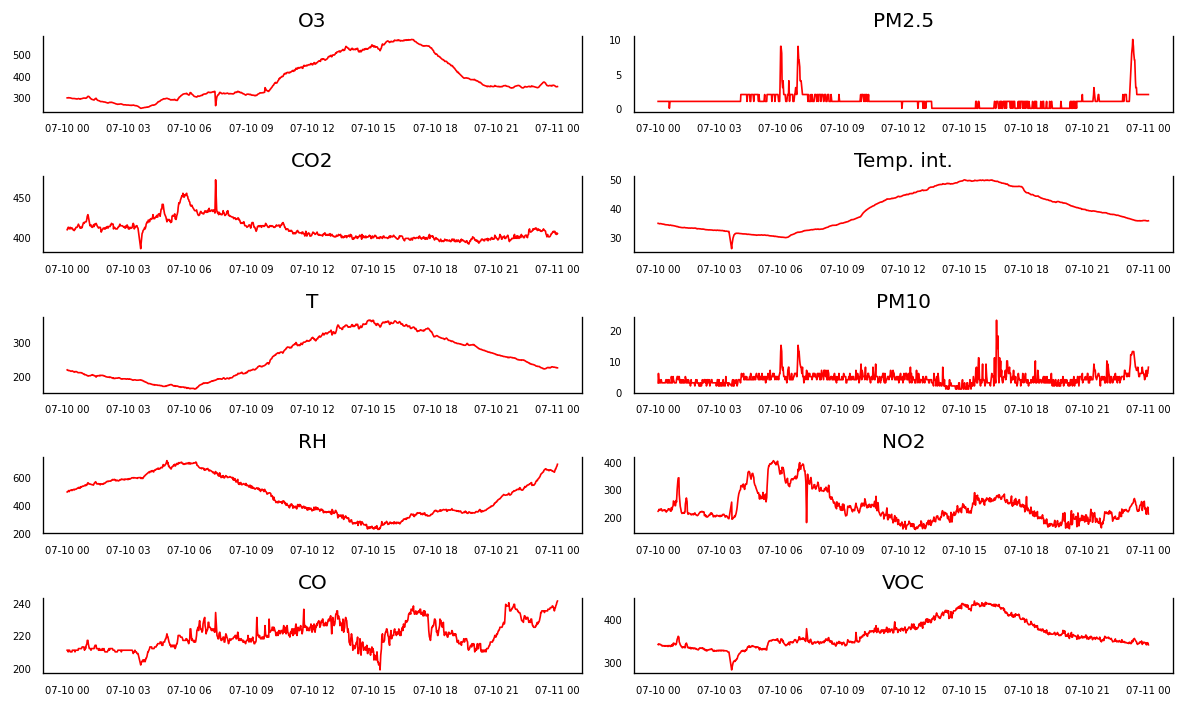

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plot
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

You can also use the next cell to get an average of all the values in a choosen timeframe (you can choose it by changing "1 hour" to whatever you want)

,avgO3,avgPM2.5,avgCO2,avgTempInt,avgT,avgPM10,avgRH,avgNO2,avgCO,avgVOC
Dates,,,,,,,,,,
2021-07-10 00:00:00,295.794872,0.974359,413.102564,34.104872,211.897436,3.512821,515.820513,237.282051,211.615385,340.435897
2021-07-10 01:00:00,287.815789,1.000000,413.552632,33.093684,201.868421,3.342105,549.657895,224.368421,211.894737,335.105263
2021-07-10 02:00:00,270.700000,1.000000,413.000000,32.457750,194.675000,3.125000,575.500000,208.900000,211.025000,328.525000
2021-07-10 03:00:00,258.411765,1.000000,410.647059,31.218235,187.823529,2.941176,595.911765,214.029412,208.029412,315.058824
2021-07-10 04:00:00,278.421053,1.763158,426.473684,30.853421,174.447368,4.578947,659.631579,320.631579,214.657895,331.131579
2021-07-10 05:00:00,301.461538,1.589744,438.307692,30.367179,170.384615,4.871795,686.717949,347.487179,216.230769,342.487179
2021-07-10 06:00:00,312.641026,3.358974,432.923077,30.615385,173.282051,7.076923,670.820513,347.461538,223.025641,347.564103
2021-07-10 07:00:00,317.394737,1.736842,431.473684,32.367632,191.526316,5.263158,611.736842,327.289474,220.210526,349.026316
2021-07-10 08:00:00,318.631579,1.263158,418.894737,33.766316,208.000000,4.815789,555.078947,267.894737,217.736842,346.368421


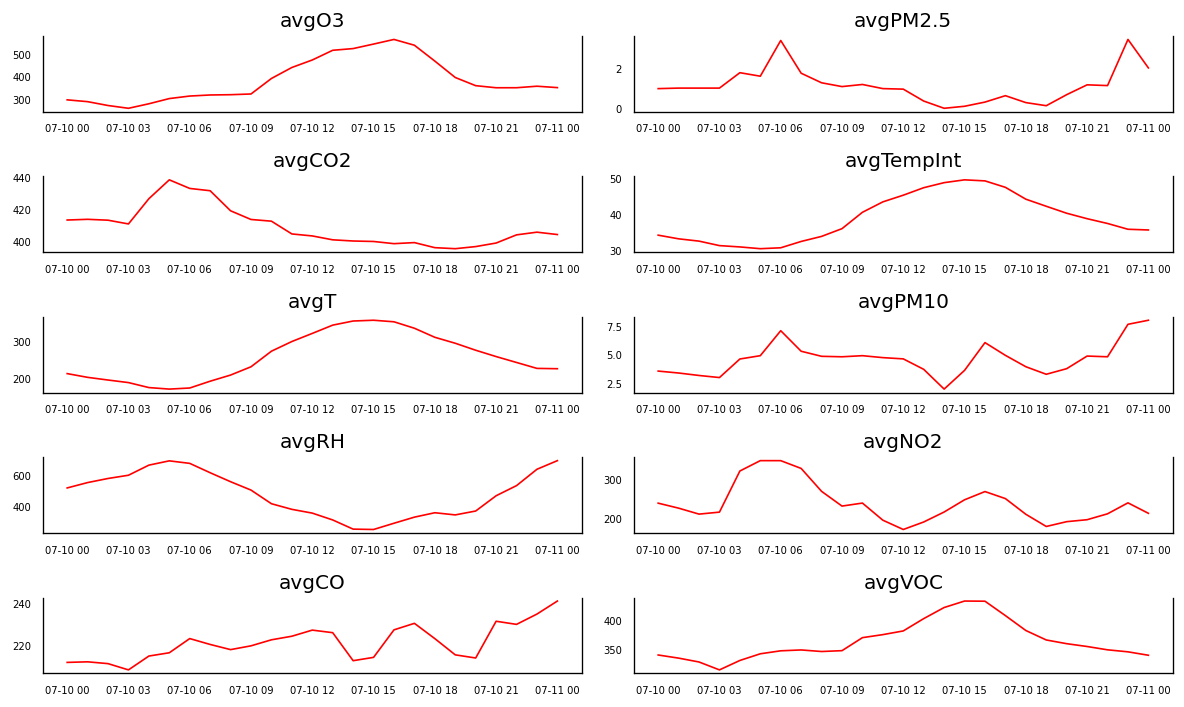

In [3]:
import pandas as pd
import psycopg2
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline


conn = psycopg2.connect(host='playground.magentalab.it', port='55432', database='airqino', user='datareader', password='homntLZnlhQd9prtVA9SFezQek')

query=""" select time_bucket('1 hour', c."Dates" ) as "bucket", avg(c."O3") as "avgO3" ,  avg(c."PM2.5") as "avgPM2.5", avg(c."CO2") as "avgCO2",
 avg(c."Temp. int.") as "avgTempInt",  avg(c."T") as "avgT",  avg(c."PM10") as "avgPM10", avg(c."RH") as "avgRH", avg(c."NO2") as 
 "avgNO2", avg(c."CO") as "avgCO", avg(c."VOC") as "avgVOC"
from (select * from crosstab(
  'select sd.data_acquired as timestamp, s.sensor_type ,  sd.float_value as value 
from station_data sd join sensor s on s.id = sd.sensor_id
where sd.data_acquired >= to_timestamp(''2021-07-10 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
 and sd.data_acquired <= to_timestamp(''2021-07-11 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
and sd.station_id = 23284701 order by sd.data_acquired asc, 1'
 , $$VALUES ('O3'::varchar), ('PM2.5'::varchar), ('CO2'::varchar), ('Temp. int.'::varchar), ('T'::varchar)
 , ('PM10'::varchar), ('RH'::varchar), ('NO2'::varchar), ('CO'::varchar), ('VOC'::varchar)$$
) AS value ("Dates" timestamp, "O3" float, "PM2.5" float, "CO2" float, "Temp. int." float, "T" float, "PM10" float,
"RH" float, "NO2" float, "CO" float, "VOC" float))  c 
group by bucket
order by bucket asc;
 """

timebucket = pd.read_sql(query, conn)
timebucket= timebucket.rename(columns={'bucket': 'Dates'})
timebucket=timebucket.set_index('Dates')
#fix temp int
timebucket['avgTempInt'] = timebucket['avgTempInt'].div(100)

display(timebucket)

# Plot
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = timebucket[timebucket.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(timebucket.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Testing stationarity 

Test first 3 colums: O3, PM2.5, CO2

In [9]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(ts_data, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(ts_data, autolag='AIC')
    else:
        adf_test = adfuller(ts_data[column], autolag='AIC')
    p_value = adf_test[1]                   
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    return test_result

adf_test_results1 = {
    col: test_stationarity(df, col)
    for col in df[df.columns[0:3]].columns
}
adf_test_results1    

{'CO2': 'Stationary', 'O3': 'Stationary', 'PM2.5': 'Stationary'}

Test T, Temp. int. and PM10

In [10]:
adf_test_results2 = {
    col: test_stationarity(df, col)
    for col in df[df.columns[3:6]].columns
}
adf_test_results2   

{'PM10': 'Stationary', 'T': 'Stationary', 'Temp. int.': 'Stationary'}

Test RH, NO2, CO and VOC

In [11]:
adf_test_results3 = {
    col: test_stationarity(df, col)
    for col in df[df.columns[6:10]].columns
}
adf_test_results3   

{'CO': 'Stationary',
 'NO2': 'Stationary',
 'RH': 'Stationary',
 'VOC': 'Stationary'}

Converting to stationary with differencing

In [7]:
#before differencing
df_copy= df.copy()

In [8]:
def differencing(data, column, order):
    differenced_data = data[column].diff(order)
    differenced_data.fillna(differenced_data.mean(), inplace=True)
    return differenced_data
for col in df.columns:
    df[col] = differencing(df, col, 1)

Test for stationarity now

# VAR model

Finding the best lag for VAR model

In [12]:
from statsmodels.tsa.api import VAR
max_lag = 40
var_model = VAR(df)
# select the best lag order
lag_results = var_model.select_order(max_lag)
selected_lag = lag_results.aic
print(selected_lag)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


3


Finding anomalies

In [13]:
import numpy as np

#0 means that is it not an anomaly
def find_anomalies(squared_errors):
    threshold = np.mean(squared_errors) + np.std(squared_errors)
    predictions = (squared_errors >= threshold).astype(int)
    return predictions, threshold
var = VAR(df)
var_fitresults = var.fit(selected_lag)
squared_errors = var_fitresults.resid.sum(axis=1) ** 2
predictions, threshold = find_anomalies(squared_errors)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [14]:
data = df_copy.iloc[selected_lag:, :]
data['Predictions'] = predictions.values
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 00:04:00,299.0,1.0,412.0,34.50,217.0,4.0,500.0,226.0,211.0,341.0,0
2021-07-10 00:06:00,298.0,1.0,410.0,34.55,217.0,3.0,493.0,225.0,211.0,341.0,0
2021-07-10 00:07:00,298.0,1.0,411.0,34.57,217.0,3.0,498.0,228.0,211.0,341.0,0
2021-07-10 00:09:00,298.0,1.0,412.0,34.52,216.0,4.0,502.0,230.0,210.0,339.0,0
2021-07-10 00:11:00,297.0,1.0,410.0,34.45,215.0,3.0,503.0,225.0,210.0,339.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-10 23:54:00,351.0,2.0,404.0,35.54,226.0,7.0,654.0,210.0,237.0,340.0,0
2021-07-10 23:55:00,350.0,2.0,404.0,35.51,226.0,5.0,654.0,226.0,238.0,344.0,0
2021-07-10 23:57:00,349.0,2.0,403.0,35.48,226.0,6.0,669.0,224.0,239.0,343.0,0


In [15]:
data['Predictions'].value_counts()

0    848
1     82
Name: Predictions, dtype: int64

# Showing the Anomalies

The anomaly is shown with the 3 previous values, all the following anomalous values and the following 2 non-anomalous values

> The anomaly is always the 4-th row



Diplay all the anomalies

In [16]:
index_no = data.columns.get_loc('Predictions')
i=0
while(i<len(data)):
  if(data.iloc[[i],[index_no]].values == 1):
    j=i+1
    while(data.iloc[[j],[index_no]].values == 1):
      j=j+1
    tmp=data.iloc[i - 3 : j + 2]
    display(tmp)
    i=j
  else:
    i=i+1    

,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 00:51:00,297.0,1.0,418.0,33.70,205.0,3.0,536.0,241.0,211.0,340.0,0
2021-07-10 00:53:00,297.0,1.0,419.0,33.64,205.0,3.0,540.0,260.0,213.0,341.0,0
2021-07-10 00:54:00,296.0,1.0,419.0,33.56,205.0,4.0,535.0,254.0,212.0,344.0,0
2021-07-10 00:56:00,297.0,1.0,419.0,33.54,204.0,5.0,538.0,300.0,214.0,353.0,1
2021-07-10 00:58:00,299.0,1.0,423.0,33.55,203.0,5.0,540.0,331.0,215.0,357.0,1
2021-07-10 00:59:00,302.0,1.0,426.0,33.43,202.0,4.0,549.0,341.0,217.0,360.0,1
2021-07-10 01:01:00,305.0,1.0,428.0,33.35,202.0,5.0,556.0,342.0,217.0,358.0,0
2021-07-10 01:02:00,305.0,1.0,426.0,33.33,201.0,5.0,549.0,283.0,215.0,347.0,1


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 00:58:00,299.0,1.0,423.0,33.55,203.0,5.0,540.0,331.0,215.0,357.0,1
2021-07-10 00:59:00,302.0,1.0,426.0,33.43,202.0,4.0,549.0,341.0,217.0,360.0,1
2021-07-10 01:01:00,305.0,1.0,428.0,33.35,202.0,5.0,556.0,342.0,217.0,358.0,0
2021-07-10 01:02:00,305.0,1.0,426.0,33.33,201.0,5.0,549.0,283.0,215.0,347.0,1
2021-07-10 01:04:00,304.0,1.0,421.0,33.34,202.0,3.0,550.0,255.0,213.0,343.0,1
2021-07-10 01:05:00,302.0,1.0,419.0,33.29,202.0,4.0,547.0,239.0,212.0,340.0,0
2021-07-10 01:07:00,299.0,1.0,414.0,33.24,202.0,3.0,546.0,227.0,212.0,338.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 01:16:00,290.0,1.0,413.0,33.25,204.0,3.0,540.0,217.0,212.0,334.0,0
2021-07-10 01:17:00,289.0,1.0,415.0,33.25,203.0,3.0,539.0,214.0,212.0,335.0,0
2021-07-10 01:19:00,288.0,1.0,413.0,33.17,203.0,3.0,548.0,219.0,212.0,333.0,0
2021-07-10 01:20:00,291.0,1.0,416.0,33.14,202.0,5.0,554.0,247.0,213.0,340.0,1
2021-07-10 01:22:00,293.0,1.0,415.0,33.13,201.0,4.0,558.0,262.0,214.0,343.0,0
2021-07-10 01:23:00,295.0,1.0,416.0,33.10,201.0,3.0,563.0,269.0,214.0,344.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 01:22:00,293.0,1.0,415.0,33.13,201.0,4.0,558.0,262.0,214.0,343.0,0
2021-07-10 01:23:00,295.0,1.0,416.0,33.10,201.0,3.0,563.0,269.0,214.0,344.0,0
2021-07-10 01:25:00,296.0,1.0,417.0,33.08,198.0,4.0,559.0,256.0,214.0,340.0,0
2021-07-10 01:26:00,293.0,1.0,416.0,33.10,201.0,3.0,550.0,219.0,212.0,335.0,1
2021-07-10 01:28:00,289.0,1.0,414.0,33.05,201.0,3.0,547.0,210.0,212.0,333.0,0
2021-07-10 01:29:00,287.0,1.0,413.0,33.03,202.0,4.0,548.0,213.0,212.0,334.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 04:18:00,267.0,2.0,424.0,31.00,175.0,4.0,645.0,320.0,213.0,328.0,0
2021-07-10 04:20:00,268.0,2.0,425.0,30.95,175.0,5.0,648.0,319.0,213.0,328.0,0
2021-07-10 04:21:00,270.0,1.0,425.0,30.87,175.0,4.0,652.0,328.0,213.0,331.0,0
2021-07-10 04:23:00,273.0,2.0,427.0,30.90,175.0,4.0,655.0,348.0,214.0,335.0,1
2021-07-10 04:24:00,275.0,2.0,425.0,30.91,175.0,4.0,654.0,361.0,214.0,335.0,0
2021-07-10 04:26:00,277.0,2.0,425.0,30.92,174.0,4.0,655.0,365.0,215.0,337.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 04:30:00,281.0,1.0,429.0,30.84,174.0,4.0,654.0,352.0,215.0,334.0,0
2021-07-10 04:32:00,282.0,1.0,429.0,30.80,174.0,6.0,658.0,342.0,215.0,335.0,0
2021-07-10 04:33:00,284.0,2.0,426.0,30.78,173.0,4.0,657.0,337.0,216.0,335.0,0
2021-07-10 04:36:00,288.0,2.0,435.0,30.73,173.0,4.0,666.0,357.0,216.0,338.0,1
2021-07-10 04:38:00,289.0,2.0,435.0,30.75,173.0,4.0,664.0,358.0,214.0,336.0,0
2021-07-10 04:39:00,290.0,2.0,441.0,30.70,172.0,5.0,663.0,352.0,214.0,337.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 04:53:00,296.0,2.0,419.0,30.62,173.0,5.0,714.0,286.0,221.0,335.0,0
2021-07-10 04:55:00,295.0,1.0,422.0,30.67,173.0,4.0,693.0,288.0,219.0,333.0,0
2021-07-10 04:56:00,295.0,2.0,421.0,30.65,174.0,6.0,701.0,282.0,219.0,333.0,0
2021-07-10 04:58:00,293.0,1.0,421.0,30.62,174.0,4.0,673.0,265.0,217.0,328.0,1
2021-07-10 04:59:00,292.0,1.0,422.0,30.65,175.0,5.0,675.0,280.0,216.0,333.0,0
2021-07-10 05:01:00,292.0,1.0,420.0,30.62,175.0,5.0,665.0,267.0,215.0,330.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 05:13:00,290.0,2.0,426.0,30.66,172.0,5.0,683.0,278.0,214.0,331.0,0
2021-07-10 05:14:00,290.0,1.0,427.0,30.62,172.0,5.0,681.0,278.0,214.0,331.0,0
2021-07-10 05:16:00,291.0,1.0,429.0,30.57,173.0,3.0,688.0,283.0,214.0,331.0,0
2021-07-10 05:17:00,289.0,1.0,423.0,30.54,172.0,5.0,675.0,255.0,212.0,328.0,1
2021-07-10 05:19:00,287.0,1.0,422.0,30.53,171.0,4.0,680.0,271.0,213.0,328.0,0
2021-07-10 05:20:00,287.0,2.0,422.0,30.53,172.0,5.0,687.0,307.0,214.0,336.0,1


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 05:16:00,291.0,1.0,429.0,30.57,173.0,3.0,688.0,283.0,214.0,331.0,0
2021-07-10 05:17:00,289.0,1.0,423.0,30.54,172.0,5.0,675.0,255.0,212.0,328.0,1
2021-07-10 05:19:00,287.0,1.0,422.0,30.53,171.0,4.0,680.0,271.0,213.0,328.0,0
2021-07-10 05:20:00,287.0,2.0,422.0,30.53,172.0,5.0,687.0,307.0,214.0,336.0,1
2021-07-10 05:22:00,287.0,2.0,427.0,30.56,172.0,5.0,692.0,354.0,215.0,340.0,1
2021-07-10 05:23:00,286.0,2.0,428.0,30.52,172.0,6.0,695.0,372.0,215.0,344.0,0
2021-07-10 05:25:00,290.0,2.0,432.0,30.47,171.0,5.0,687.0,385.0,218.0,347.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 06:21:00,302.0,2.0,432.0,29.89,167.0,7.0,681.0,324.0,223.0,343.0,0
2021-07-10 06:23:00,305.0,2.0,429.0,30.01,169.0,8.0,679.0,314.0,224.0,343.0,0
2021-07-10 06:24:00,307.0,4.0,428.0,30.12,169.0,8.0,677.0,319.0,225.0,346.0,0
2021-07-10 06:26:00,306.0,1.0,427.0,30.23,171.0,4.0,670.0,310.0,223.0,340.0,1
2021-07-10 06:27:00,305.0,2.0,427.0,30.38,173.0,5.0,667.0,319.0,226.0,346.0,0
2021-07-10 06:29:00,306.0,2.0,428.0,30.51,174.0,4.0,663.0,324.0,229.0,347.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 06:45:00,316.0,3.0,433.0,31.39,181.0,6.0,647.0,338.0,226.0,349.0,0
2021-07-10 06:47:00,316.0,2.0,432.0,31.43,181.0,5.0,652.0,342.0,224.0,347.0,0
2021-07-10 06:48:00,317.0,3.0,431.0,31.53,181.0,5.0,650.0,342.0,221.0,345.0,0
2021-07-10 06:50:00,318.0,7.0,431.0,31.58,181.0,11.0,654.0,357.0,223.0,349.0,1
2021-07-10 06:51:00,320.0,9.0,433.0,31.65,180.0,15.0,652.0,373.0,223.0,351.0,0
2021-07-10 06:53:00,323.0,7.0,431.0,31.57,181.0,13.0,658.0,367.0,224.0,352.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 07:08:00,326.0,2.0,432.0,32.09,186.0,3.0,628.0,379.0,223.0,353.0,0
2021-07-10 07:10:00,325.0,2.0,434.0,32.10,188.0,5.0,630.0,366.0,223.0,352.0,0
2021-07-10 07:11:00,327.0,2.0,433.0,32.19,188.0,5.0,631.0,367.0,224.0,353.0,0
2021-07-10 07:13:00,328.0,2.0,432.0,32.16,188.0,5.0,619.0,343.0,222.0,348.0,1
2021-07-10 07:14:00,327.0,2.0,430.0,32.17,189.0,4.0,619.0,324.0,222.0,351.0,0
2021-07-10 07:16:00,262.0,2.0,472.0,32.24,189.0,7.0,636.0,180.0,234.0,378.0,1


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 07:11:00,327.0,2.0,433.0,32.19,188.0,5.0,631.0,367.0,224.0,353.0,0
2021-07-10 07:13:00,328.0,2.0,432.0,32.16,188.0,5.0,619.0,343.0,222.0,348.0,1
2021-07-10 07:14:00,327.0,2.0,430.0,32.17,189.0,4.0,619.0,324.0,222.0,351.0,0
2021-07-10 07:16:00,262.0,2.0,472.0,32.24,189.0,7.0,636.0,180.0,234.0,378.0,1
2021-07-10 07:19:00,297.0,2.0,435.0,32.24,191.0,6.0,625.0,355.0,224.0,354.0,0
2021-07-10 07:20:00,304.0,1.0,432.0,32.29,191.0,4.0,621.0,336.0,220.0,348.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 07:23:00,312.0,1.0,431.0,32.27,193.0,5.0,608.0,321.0,218.0,346.0,0
2021-07-10 07:25:00,313.0,1.0,428.0,32.35,192.0,6.0,607.0,319.0,218.0,345.0,0
2021-07-10 07:26:00,317.0,1.0,431.0,32.38,193.0,5.0,603.0,329.0,221.0,351.0,0
2021-07-10 07:28:00,323.0,1.0,430.0,32.41,193.0,5.0,627.0,342.0,222.0,353.0,1
2021-07-10 07:29:00,323.0,2.0,429.0,32.43,193.0,5.0,612.0,343.0,221.0,350.0,0
2021-07-10 07:31:00,322.0,1.0,429.0,32.45,193.0,5.0,598.0,319.0,218.0,346.0,1


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 07:26:00,317.0,1.0,431.0,32.38,193.0,5.0,603.0,329.0,221.0,351.0,0
2021-07-10 07:28:00,323.0,1.0,430.0,32.41,193.0,5.0,627.0,342.0,222.0,353.0,1
2021-07-10 07:29:00,323.0,2.0,429.0,32.43,193.0,5.0,612.0,343.0,221.0,350.0,0
2021-07-10 07:31:00,322.0,1.0,429.0,32.45,193.0,5.0,598.0,319.0,218.0,346.0,1
2021-07-10 07:32:00,320.0,2.0,428.0,32.50,192.0,4.0,593.0,302.0,217.0,342.0,0
2021-07-10 07:34:00,318.0,1.0,428.0,32.41,192.0,5.0,596.0,303.0,217.0,343.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 08:19:00,325.0,2.0,423.0,33.36,205.0,7.0,571.0,301.0,219.0,355.0,0
2021-07-10 08:21:00,328.0,2.0,423.0,33.49,208.0,6.0,580.0,315.0,222.0,357.0,0
2021-07-10 08:22:00,328.0,1.0,424.0,33.61,209.0,4.0,554.0,303.0,221.0,352.0,0
2021-07-10 08:24:00,325.0,1.0,423.0,33.69,208.0,4.0,545.0,271.0,217.0,347.0,1
2021-07-10 08:25:00,326.0,1.0,421.0,33.75,208.0,4.0,554.0,273.0,218.0,350.0,0
2021-07-10 08:27:00,324.0,1.0,421.0,33.78,209.0,5.0,544.0,265.0,217.0,347.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 08:41:00,314.0,1.0,415.0,34.03,209.0,5.0,544.0,236.0,216.0,338.0,0
2021-07-10 08:42:00,313.0,1.0,414.0,33.99,209.0,4.0,542.0,237.0,216.0,337.0,0
2021-07-10 08:44:00,311.0,1.0,414.0,34.03,209.0,3.0,540.0,230.0,215.0,341.0,0
2021-07-10 08:45:00,311.0,1.0,414.0,34.15,211.0,5.0,551.0,255.0,216.0,346.0,1
2021-07-10 08:47:00,314.0,1.0,413.0,34.20,212.0,4.0,536.0,240.0,217.0,343.0,0
2021-07-10 08:48:00,315.0,1.0,412.0,34.24,211.0,4.0,536.0,240.0,217.0,345.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 08:57:00,314.0,1.0,414.0,34.63,216.0,4.0,539.0,236.0,218.0,344.0,0
2021-07-10 08:59:00,314.0,1.0,411.0,34.76,218.0,4.0,530.0,233.0,217.0,345.0,0
2021-07-10 09:00:00,312.0,1.0,412.0,34.70,218.0,5.0,519.0,224.0,216.0,340.0,0
2021-07-10 09:02:00,311.0,1.0,417.0,34.72,218.0,4.0,533.0,247.0,218.0,345.0,1
2021-07-10 09:03:00,310.0,1.0,418.0,34.74,219.0,4.0,520.0,225.0,217.0,343.0,1
2021-07-10 09:05:00,311.0,1.0,418.0,34.81,220.0,6.0,525.0,246.0,219.0,346.0,1
2021-07-10 09:06:00,310.0,1.0,418.0,34.88,221.0,5.0,516.0,234.0,217.0,343.0,0
2021-07-10 09:08:00,310.0,1.0,414.0,34.98,220.0,5.0,521.0,226.0,216.0,342.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 09:12:00,308.0,1.0,411.0,35.14,220.0,3.0,510.0,207.0,216.0,340.0,0
2021-07-10 09:14:00,310.0,1.0,408.0,35.14,221.0,3.0,514.0,206.0,216.0,340.0,0
2021-07-10 09:15:00,309.0,1.0,407.0,35.19,223.0,4.0,517.0,212.0,217.0,343.0,0
2021-07-10 09:17:00,310.0,1.0,409.0,35.24,224.0,4.0,520.0,239.0,231.0,352.0,1
2021-07-10 09:19:00,313.0,1.0,413.0,35.33,226.0,4.0,515.0,237.0,222.0,348.0,0
2021-07-10 09:20:00,315.0,1.0,413.0,35.44,228.0,5.0,510.0,235.0,220.0,347.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 09:35:00,322.0,1.0,414.0,36.03,230.0,4.0,506.0,226.0,219.0,345.0,0
2021-07-10 09:37:00,322.0,1.0,414.0,36.12,231.0,4.0,496.0,223.0,218.0,345.0,0
2021-07-10 09:38:00,323.0,1.0,413.0,36.19,231.0,4.0,493.0,230.0,218.0,348.0,0
2021-07-10 09:40:00,324.0,1.0,414.0,36.25,232.0,4.0,509.0,245.0,221.0,351.0,1
2021-07-10 09:41:00,345.0,1.0,414.0,36.34,233.0,7.0,498.0,250.0,226.0,369.0,1
2021-07-10 09:43:00,340.0,1.0,417.0,36.39,234.0,4.0,495.0,237.0,220.0,354.0,0
2021-07-10 09:44:00,335.0,1.0,416.0,36.48,236.0,5.0,493.0,236.0,220.0,348.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 10:02:00,349.0,2.0,414.0,38.19,255.0,5.0,464.0,250.0,225.0,363.0,0
2021-07-10 10:04:00,354.0,1.0,413.0,38.43,258.0,5.0,450.0,243.0,225.0,363.0,0
2021-07-10 10:06:00,356.0,2.0,413.0,38.62,259.0,5.0,433.0,240.0,223.0,362.0,0
2021-07-10 10:07:00,360.0,1.0,412.0,38.77,259.0,4.0,453.0,266.0,225.0,371.0,1
2021-07-10 10:09:00,364.0,2.0,412.0,38.93,262.0,8.0,433.0,257.0,224.0,368.0,0
2021-07-10 10:10:00,367.0,1.0,412.0,39.13,262.0,5.0,430.0,249.0,223.0,365.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 10:36:00,405.0,1.0,416.0,40.92,273.0,4.0,425.0,257.0,226.0,379.0,0
2021-07-10 10:37:00,408.0,1.0,415.0,41.06,275.0,4.0,423.0,253.0,225.0,374.0,0
2021-07-10 10:39:00,408.0,1.0,412.0,41.14,277.0,9.0,407.0,233.0,222.0,372.0,0
2021-07-10 10:40:00,411.0,1.0,412.0,41.24,278.0,5.0,415.0,275.0,225.0,385.0,1
2021-07-10 10:42:00,411.0,1.0,410.0,41.32,279.0,5.0,401.0,228.0,222.0,369.0,1
2021-07-10 10:43:00,409.0,1.0,409.0,41.37,282.0,5.0,395.0,223.0,221.0,371.0,0
2021-07-10 10:45:00,413.0,1.0,410.0,41.47,283.0,5.0,408.0,250.0,224.0,377.0,1


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 10:40:00,411.0,1.0,412.0,41.24,278.0,5.0,415.0,275.0,225.0,385.0,1
2021-07-10 10:42:00,411.0,1.0,410.0,41.32,279.0,5.0,401.0,228.0,222.0,369.0,1
2021-07-10 10:43:00,409.0,1.0,409.0,41.37,282.0,5.0,395.0,223.0,221.0,371.0,0
2021-07-10 10:45:00,413.0,1.0,410.0,41.47,283.0,5.0,408.0,250.0,224.0,377.0,1
2021-07-10 10:46:00,415.0,1.0,410.0,41.59,285.0,3.0,398.0,252.0,226.0,379.0,0
2021-07-10 10:48:00,415.0,1.0,410.0,41.66,286.0,4.0,394.0,220.0,222.0,371.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 10:59:00,419.0,1.0,408.0,42.08,284.0,5.0,405.0,215.0,223.0,374.0,0
2021-07-10 11:00:00,421.0,1.0,407.0,42.16,287.0,6.0,399.0,218.0,224.0,375.0,0
2021-07-10 11:02:00,424.0,1.0,406.0,42.37,290.0,6.0,392.0,214.0,224.0,375.0,0
2021-07-10 11:03:00,422.0,1.0,404.0,42.44,291.0,4.0,374.0,193.0,220.0,367.0,1
2021-07-10 11:05:00,420.0,1.0,404.0,42.45,292.0,3.0,389.0,208.0,221.0,371.0,0
2021-07-10 11:06:00,425.0,1.0,405.0,42.58,293.0,6.0,387.0,209.0,224.0,375.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 11:06:00,425.0,1.0,405.0,42.58,293.0,6.0,387.0,209.0,224.0,375.0,0
2021-07-10 11:08:00,424.0,1.0,404.0,42.65,294.0,3.0,383.0,205.0,222.0,371.0,0
2021-07-10 11:09:00,424.0,1.0,405.0,42.76,293.0,4.0,378.0,206.0,221.0,372.0,0
2021-07-10 11:11:00,430.0,1.0,404.0,42.88,297.0,4.0,388.0,224.0,226.0,381.0,1
2021-07-10 11:12:00,434.0,1.0,405.0,43.04,299.0,4.0,386.0,233.0,227.0,381.0,0
2021-07-10 11:14:00,434.0,1.0,407.0,43.05,296.0,5.0,369.0,193.0,222.0,370.0,1


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 11:09:00,424.0,1.0,405.0,42.76,293.0,4.0,378.0,206.0,221.0,372.0,0
2021-07-10 11:11:00,430.0,1.0,404.0,42.88,297.0,4.0,388.0,224.0,226.0,381.0,1
2021-07-10 11:12:00,434.0,1.0,405.0,43.04,299.0,4.0,386.0,233.0,227.0,381.0,0
2021-07-10 11:14:00,434.0,1.0,407.0,43.05,296.0,5.0,369.0,193.0,222.0,370.0,1
2021-07-10 11:15:00,430.0,1.0,407.0,43.03,292.0,5.0,380.0,190.0,220.0,369.0,0
2021-07-10 11:17:00,433.0,1.0,408.0,43.02,290.0,5.0,400.0,205.0,223.0,375.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 11:29:00,440.0,1.0,404.0,43.20,294.0,5.0,385.0,189.0,223.0,371.0,0
2021-07-10 11:30:00,435.0,1.0,406.0,43.24,293.0,7.0,374.0,179.0,221.0,368.0,0
2021-07-10 11:32:00,434.0,1.0,406.0,43.32,296.0,6.0,377.0,184.0,223.0,369.0,0
2021-07-10 11:33:00,440.0,1.0,404.0,43.34,299.0,6.0,386.0,193.0,226.0,379.0,1
2021-07-10 11:35:00,447.0,1.0,404.0,43.39,300.0,4.0,388.0,205.0,236.0,394.0,1
2021-07-10 11:37:00,447.0,1.0,403.0,43.40,300.0,4.0,376.0,184.0,225.0,376.0,1
2021-07-10 11:38:00,444.0,1.0,401.0,43.48,300.0,4.0,373.0,186.0,226.0,376.0,0
2021-07-10 11:40:00,445.0,1.0,405.0,43.57,301.0,5.0,383.0,198.0,226.0,380.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 11:41:00,446.0,1.0,407.0,43.67,302.0,4.0,375.0,188.0,225.0,377.0,0
2021-07-10 11:43:00,448.0,1.0,402.0,43.78,303.0,5.0,378.0,188.0,225.0,376.0,0
2021-07-10 11:44:00,446.0,1.0,401.0,43.90,305.0,4.0,363.0,173.0,223.0,369.0,0
2021-07-10 11:46:00,447.0,1.0,404.0,43.95,304.0,5.0,376.0,191.0,225.0,376.0,1
2021-07-10 11:47:00,449.0,1.0,404.0,43.97,304.0,3.0,361.0,177.0,224.0,376.0,1
2021-07-10 11:49:00,450.0,1.0,405.0,43.80,303.0,5.0,375.0,173.0,223.0,375.0,0
2021-07-10 11:50:00,451.0,1.0,404.0,43.81,303.0,4.0,377.0,173.0,224.0,376.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 12:01:00,450.0,1.0,405.0,44.33,314.0,5.0,359.0,165.0,223.0,373.0,0
2021-07-10 12:02:00,454.0,1.0,406.0,44.30,313.0,6.0,365.0,174.0,226.0,378.0,0
2021-07-10 12:04:00,456.0,1.0,405.0,44.42,311.0,4.0,361.0,165.0,224.0,378.0,0
2021-07-10 12:05:00,460.0,1.0,405.0,44.42,308.0,5.0,381.0,184.0,227.0,382.0,1
2021-07-10 12:07:00,460.0,1.0,404.0,44.40,309.0,6.0,364.0,166.0,226.0,375.0,1
2021-07-10 12:08:00,453.0,1.0,403.0,44.56,306.0,6.0,363.0,156.0,222.0,368.0,0
2021-07-10 12:10:00,455.0,1.0,404.0,44.56,304.0,6.0,382.0,168.0,225.0,375.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 12:28:00,475.0,1.0,402.0,44.93,321.0,5.0,360.0,165.0,228.0,380.0,0
2021-07-10 12:30:00,475.0,1.0,401.0,45.12,323.0,4.0,364.0,174.0,230.0,386.0,0
2021-07-10 12:31:00,478.0,1.0,403.0,45.28,326.0,4.0,355.0,175.0,230.0,389.0,0
2021-07-10 12:33:00,476.0,1.0,403.0,45.27,323.0,4.0,342.0,157.0,226.0,378.0,1
2021-07-10 12:34:00,477.0,1.0,404.0,45.22,321.0,3.0,352.0,161.0,227.0,383.0,0
2021-07-10 12:36:00,474.0,1.0,404.0,45.25,323.0,3.0,346.0,155.0,226.0,376.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 12:48:00,488.0,1.0,403.0,45.76,329.0,4.0,351.0,172.0,230.0,390.0,0
2021-07-10 12:49:00,489.0,1.0,402.0,45.76,330.0,3.0,346.0,169.0,229.0,387.0,0
2021-07-10 12:51:00,488.0,1.0,402.0,45.77,330.0,4.0,343.0,168.0,229.0,384.0,0
2021-07-10 12:52:00,490.0,1.0,404.0,45.89,331.0,4.0,351.0,186.0,231.0,393.0,1
2021-07-10 12:54:00,493.0,1.0,401.0,45.98,333.0,4.0,346.0,181.0,232.0,392.0,0
2021-07-10 12:55:00,494.0,1.0,402.0,46.08,335.0,4.0,332.0,167.0,229.0,388.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 12:52:00,490.0,1.0,404.0,45.89,331.0,4.0,351.0,186.0,231.0,393.0,1
2021-07-10 12:54:00,493.0,1.0,401.0,45.98,333.0,4.0,346.0,181.0,232.0,392.0,0
2021-07-10 12:55:00,494.0,1.0,402.0,46.08,335.0,4.0,332.0,167.0,229.0,388.0,0
2021-07-10 12:57:00,487.0,1.0,403.0,46.14,326.0,3.0,330.0,158.0,221.0,379.0,1
2021-07-10 12:58:00,491.0,0.0,403.0,45.96,321.0,5.0,365.0,168.0,227.0,393.0,1
2021-07-10 13:00:00,495.0,1.0,401.0,45.94,325.0,4.0,357.0,176.0,231.0,393.0,0
2021-07-10 13:01:00,496.0,1.0,401.0,46.00,330.0,4.0,341.0,164.0,229.0,388.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 13:12:00,509.0,1.0,401.0,46.32,342.0,4.0,344.0,179.0,235.0,401.0,0
2021-07-10 13:14:00,510.0,1.0,401.0,46.60,348.0,4.0,327.0,188.0,235.0,396.0,0
2021-07-10 13:15:00,510.0,1.0,401.0,46.79,350.0,3.0,305.0,172.0,230.0,393.0,0
2021-07-10 13:17:00,511.0,1.0,403.0,46.90,349.0,3.0,326.0,184.0,232.0,399.0,1
2021-07-10 13:18:00,513.0,1.0,402.0,46.96,346.0,4.0,319.0,185.0,231.0,399.0,0
2021-07-10 13:20:00,514.0,1.0,402.0,47.05,343.0,4.0,323.0,189.0,230.0,396.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 13:17:00,511.0,1.0,403.0,46.90,349.0,3.0,326.0,184.0,232.0,399.0,1
2021-07-10 13:18:00,513.0,1.0,402.0,46.96,346.0,4.0,319.0,185.0,231.0,399.0,0
2021-07-10 13:20:00,514.0,1.0,402.0,47.05,343.0,4.0,323.0,189.0,230.0,396.0,0
2021-07-10 13:21:00,509.0,1.0,402.0,47.13,341.0,4.0,315.0,170.0,226.0,392.0,1
2021-07-10 13:23:00,510.0,1.0,403.0,47.10,341.0,4.0,319.0,177.0,228.0,395.0,0
2021-07-10 13:24:00,513.0,0.0,401.0,47.13,341.0,3.0,326.0,184.0,227.0,401.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 13:27:00,516.0,0.0,401.0,47.15,337.0,3.0,304.0,184.0,223.0,401.0,0
2021-07-10 13:29:00,518.0,0.0,400.0,47.15,338.0,2.0,322.0,193.0,226.0,405.0,0
2021-07-10 13:30:00,521.0,0.0,399.0,47.27,343.0,6.0,326.0,200.0,230.0,408.0,0
2021-07-10 13:32:00,516.0,0.0,399.0,47.49,345.0,4.0,294.0,185.0,222.0,398.0,1
2021-07-10 13:35:00,518.0,0.0,401.0,47.53,345.0,4.0,307.0,183.0,225.0,405.0,0
2021-07-10 13:36:00,524.0,0.0,400.0,47.57,348.0,2.0,314.0,194.0,229.0,409.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 13:32:00,516.0,0.0,399.0,47.49,345.0,4.0,294.0,185.0,222.0,398.0,1
2021-07-10 13:35:00,518.0,0.0,401.0,47.53,345.0,4.0,307.0,183.0,225.0,405.0,0
2021-07-10 13:36:00,524.0,0.0,400.0,47.57,348.0,2.0,314.0,194.0,229.0,409.0,0
2021-07-10 13:38:00,532.0,0.0,401.0,47.64,349.0,5.0,319.0,203.0,231.0,415.0,1
2021-07-10 13:39:00,535.0,0.0,401.0,47.77,350.0,4.0,308.0,200.0,230.0,410.0,0
2021-07-10 13:41:00,531.0,0.0,399.0,47.80,349.0,2.0,308.0,204.0,229.0,409.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 13:44:00,528.0,0.0,401.0,47.95,346.0,4.0,300.0,191.0,222.0,404.0,0
2021-07-10 13:45:00,526.0,0.0,401.0,47.97,344.0,3.0,306.0,194.0,224.0,405.0,0
2021-07-10 13:47:00,526.0,0.0,402.0,47.94,345.0,2.0,302.0,195.0,221.0,405.0,0
2021-07-10 13:48:00,521.0,0.0,401.0,48.04,344.0,3.0,280.0,189.0,216.0,402.0,1
2021-07-10 13:50:00,519.0,0.0,400.0,48.04,345.0,3.0,276.0,200.0,215.0,405.0,0
2021-07-10 13:52:00,517.0,0.0,403.0,48.01,344.0,2.0,278.0,200.0,214.0,411.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 13:50:00,519.0,0.0,400.0,48.04,345.0,3.0,276.0,200.0,215.0,405.0,0
2021-07-10 13:52:00,517.0,0.0,403.0,48.01,344.0,2.0,278.0,200.0,214.0,411.0,0
2021-07-10 13:53:00,520.0,0.0,401.0,48.02,345.0,2.0,289.0,213.0,218.0,413.0,0
2021-07-10 13:55:00,525.0,0.0,402.0,48.12,349.0,3.0,291.0,223.0,221.0,415.0,1
2021-07-10 13:56:00,524.0,0.0,400.0,48.28,351.0,8.0,280.0,221.0,220.0,417.0,0
2021-07-10 13:58:00,526.0,0.0,397.0,48.22,351.0,4.0,268.0,212.0,216.0,409.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 14:10:00,525.0,0.0,399.0,48.41,352.0,1.0,268.0,195.0,216.0,419.0,0
2021-07-10 14:11:00,523.0,0.0,400.0,48.31,350.0,1.0,270.0,194.0,215.0,415.0,0
2021-07-10 14:13:00,526.0,0.0,398.0,48.34,352.0,2.0,280.0,203.0,219.0,420.0,0
2021-07-10 14:14:00,519.0,0.0,400.0,48.40,348.0,1.0,251.0,191.0,209.0,402.0,1
2021-07-10 14:16:00,511.0,0.0,400.0,48.32,340.0,4.0,269.0,185.0,209.0,405.0,0
2021-07-10 14:17:00,510.0,0.0,400.0,48.24,339.0,2.0,276.0,181.0,211.0,404.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 14:16:00,511.0,0.0,400.0,48.32,340.0,4.0,269.0,185.0,209.0,405.0,0
2021-07-10 14:17:00,510.0,0.0,400.0,48.24,339.0,2.0,276.0,181.0,211.0,404.0,0
2021-07-10 14:19:00,510.0,0.0,402.0,48.17,341.0,3.0,272.0,187.0,213.0,408.0,0
2021-07-10 14:20:00,515.0,0.0,402.0,48.29,344.0,3.0,281.0,217.0,218.0,418.0,1
2021-07-10 14:22:00,516.0,0.0,401.0,48.27,347.0,2.0,270.0,192.0,215.0,412.0,0
2021-07-10 14:23:00,510.0,0.0,401.0,48.23,344.0,2.0,254.0,182.0,208.0,403.0,1


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 14:19:00,510.0,0.0,402.0,48.17,341.0,3.0,272.0,187.0,213.0,408.0,0
2021-07-10 14:20:00,515.0,0.0,402.0,48.29,344.0,3.0,281.0,217.0,218.0,418.0,1
2021-07-10 14:22:00,516.0,0.0,401.0,48.27,347.0,2.0,270.0,192.0,215.0,412.0,0
2021-07-10 14:23:00,510.0,0.0,401.0,48.23,344.0,2.0,254.0,182.0,208.0,403.0,1
2021-07-10 14:25:00,514.0,0.0,397.0,48.24,343.0,2.0,276.0,205.0,214.0,416.0,1
2021-07-10 14:26:00,516.0,0.0,403.0,48.27,345.0,2.0,277.0,211.0,215.0,414.0,0
2021-07-10 14:28:00,521.0,0.0,400.0,48.36,350.0,2.0,268.0,209.0,216.0,420.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 15:07:00,532.0,0.0,401.0,49.38,350.0,3.0,231.0,216.0,205.0,434.0,0
2021-07-10 15:09:00,533.0,0.0,399.0,49.32,349.0,3.0,249.0,222.0,208.0,429.0,0
2021-07-10 15:10:00,533.0,0.0,398.0,49.27,354.0,1.0,247.0,231.0,210.0,433.0,0
2021-07-10 15:12:00,529.0,0.0,399.0,49.39,354.0,1.0,225.0,217.0,204.0,424.0,1
2021-07-10 15:13:00,524.0,0.0,399.0,49.40,353.0,2.0,222.0,215.0,204.0,425.0,0
2021-07-10 15:15:00,523.0,0.0,399.0,49.40,351.0,2.0,228.0,216.0,202.0,424.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 15:16:00,522.0,0.0,398.0,49.32,349.0,4.0,223.0,221.0,202.0,425.0,0
2021-07-10 15:18:00,521.0,0.0,398.0,49.36,347.0,2.0,233.0,221.0,203.0,422.0,0
2021-07-10 15:19:00,515.0,0.0,400.0,49.27,344.0,1.0,229.0,214.0,199.0,420.0,0
2021-07-10 15:21:00,522.0,0.0,400.0,49.15,346.0,3.0,245.0,231.0,208.0,433.0,1
2021-07-10 15:23:00,529.0,0.0,399.0,49.21,351.0,2.0,255.0,238.0,212.0,434.0,1
2021-07-10 15:24:00,536.0,0.0,399.0,49.19,354.0,2.0,278.0,250.0,218.0,434.0,1
2021-07-10 15:26:00,546.0,0.0,398.0,49.25,356.0,5.0,267.0,251.0,221.0,434.0,0
2021-07-10 15:27:00,543.0,0.0,400.0,49.26,358.0,4.0,253.0,248.0,216.0,433.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 15:24:00,536.0,0.0,399.0,49.19,354.0,2.0,278.0,250.0,218.0,434.0,1
2021-07-10 15:26:00,546.0,0.0,398.0,49.25,356.0,5.0,267.0,251.0,221.0,434.0,0
2021-07-10 15:27:00,543.0,0.0,400.0,49.26,358.0,4.0,253.0,248.0,216.0,433.0,0
2021-07-10 15:29:00,543.0,0.0,401.0,49.34,358.0,2.0,257.0,287.0,216.0,443.0,1
2021-07-10 15:30:00,542.0,0.0,401.0,49.48,357.0,3.0,257.0,288.0,216.0,440.0,0
2021-07-10 15:32:00,545.0,0.0,399.0,49.39,358.0,4.0,260.0,243.0,217.0,433.0,1


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 15:27:00,543.0,0.0,400.0,49.26,358.0,4.0,253.0,248.0,216.0,433.0,0
2021-07-10 15:29:00,543.0,0.0,401.0,49.34,358.0,2.0,257.0,287.0,216.0,443.0,1
2021-07-10 15:30:00,542.0,0.0,401.0,49.48,357.0,3.0,257.0,288.0,216.0,440.0,0
2021-07-10 15:32:00,545.0,0.0,399.0,49.39,358.0,4.0,260.0,243.0,217.0,433.0,1
2021-07-10 15:33:00,548.0,1.0,399.0,49.40,357.0,7.0,271.0,259.0,220.0,433.0,1
2021-07-10 15:35:00,551.0,1.0,399.0,49.33,358.0,8.0,270.0,277.0,222.0,438.0,0
2021-07-10 15:36:00,554.0,0.0,399.0,49.34,360.0,3.0,268.0,268.0,222.0,436.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 15:33:00,548.0,1.0,399.0,49.40,357.0,7.0,271.0,259.0,220.0,433.0,1
2021-07-10 15:35:00,551.0,1.0,399.0,49.33,358.0,8.0,270.0,277.0,222.0,438.0,0
2021-07-10 15:36:00,554.0,0.0,399.0,49.34,360.0,3.0,268.0,268.0,222.0,436.0,0
2021-07-10 15:38:00,557.0,0.0,399.0,49.32,359.0,3.0,280.0,279.0,224.0,438.0,1
2021-07-10 15:39:00,558.0,0.0,399.0,49.39,359.0,4.0,275.0,261.0,224.0,435.0,0
2021-07-10 15:41:00,560.0,1.0,398.0,49.43,361.0,11.0,270.0,267.0,222.0,436.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 15:56:00,557.0,0.0,400.0,49.42,355.0,4.0,267.0,252.0,220.0,432.0,0
2021-07-10 15:57:00,557.0,0.0,401.0,49.44,355.0,4.0,268.0,247.0,220.0,431.0,0
2021-07-10 15:59:00,557.0,0.0,402.0,49.37,357.0,3.0,263.0,243.0,220.0,431.0,0
2021-07-10 16:00:00,561.0,0.0,401.0,49.40,359.0,2.0,277.0,261.0,223.0,438.0,1
2021-07-10 16:02:00,564.0,0.0,400.0,49.52,362.0,3.0,274.0,263.0,224.0,440.0,0
2021-07-10 16:03:00,563.0,0.0,400.0,49.53,362.0,9.0,265.0,259.0,222.0,435.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 16:29:00,564.0,1.0,396.0,49.20,347.0,6.0,294.0,261.0,226.0,435.0,0
2021-07-10 16:31:00,562.0,0.0,395.0,49.13,347.0,3.0,296.0,265.0,225.0,430.0,0
2021-07-10 16:32:00,563.0,0.0,397.0,49.14,347.0,3.0,296.0,269.0,226.0,435.0,0
2021-07-10 16:34:00,565.0,1.0,398.0,49.07,350.0,23.0,301.0,276.0,229.0,433.0,1
2021-07-10 16:35:00,564.0,1.0,398.0,49.12,351.0,15.0,294.0,277.0,229.0,433.0,0
2021-07-10 16:37:00,563.0,1.0,398.0,49.12,351.0,14.0,297.0,278.0,228.0,433.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 16:54:00,566.0,1.0,396.0,48.47,343.0,4.0,326.0,276.0,236.0,427.0,0
2021-07-10 16:55:00,566.0,1.0,398.0,48.39,343.0,5.0,328.0,274.0,235.0,421.0,0
2021-07-10 16:57:00,566.0,1.0,399.0,48.37,344.0,5.0,331.0,283.0,238.0,424.0,0
2021-07-10 16:58:00,564.0,0.0,399.0,48.31,344.0,5.0,316.0,261.0,235.0,419.0,1
2021-07-10 17:00:00,559.0,1.0,399.0,48.34,342.0,7.0,315.0,257.0,233.0,415.0,0
2021-07-10 17:01:00,558.0,1.0,398.0,48.20,339.0,4.0,323.0,253.0,233.0,416.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 17:15:00,544.0,0.0,401.0,47.52,333.0,6.0,339.0,255.0,234.0,410.0,0
2021-07-10 17:16:00,544.0,1.0,399.0,47.48,335.0,3.0,342.0,257.0,236.0,413.0,0
2021-07-10 17:18:00,544.0,1.0,399.0,47.50,336.0,4.0,340.0,276.0,236.0,416.0,0
2021-07-10 17:19:00,543.0,0.0,398.0,47.50,336.0,4.0,329.0,245.0,233.0,408.0,1
2021-07-10 17:21:00,540.0,1.0,397.0,47.34,334.0,5.0,333.0,239.0,233.0,406.0,0
2021-07-10 17:22:00,539.0,0.0,398.0,47.34,334.0,4.0,335.0,250.0,234.0,410.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 17:25:00,537.0,1.0,399.0,47.34,333.0,5.0,337.0,249.0,232.0,408.0,0
2021-07-10 17:27:00,537.0,1.0,400.0,47.35,335.0,5.0,336.0,262.0,235.0,411.0,0
2021-07-10 17:28:00,536.0,0.0,398.0,47.39,333.0,3.0,332.0,246.0,232.0,406.0,0
2021-07-10 17:30:00,537.0,0.0,399.0,47.36,335.0,5.0,341.0,267.0,235.0,413.0,1
2021-07-10 17:31:00,538.0,0.0,397.0,47.34,336.0,3.0,327.0,249.0,234.0,410.0,0
2021-07-10 17:33:00,537.0,0.0,397.0,47.33,338.0,3.0,326.0,257.0,233.0,411.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 17:53:00,521.0,1.0,400.0,46.54,325.0,5.0,333.0,236.0,225.0,400.0,0
2021-07-10 17:54:00,518.0,0.0,401.0,46.20,322.0,3.0,339.0,243.0,226.0,402.0,0
2021-07-10 17:56:00,515.0,1.0,399.0,45.82,319.0,4.0,343.0,241.0,226.0,401.0,0
2021-07-10 17:57:00,509.0,0.0,398.0,45.66,316.0,4.0,348.0,219.0,227.0,393.0,1
2021-07-10 17:59:00,506.0,1.0,396.0,45.51,316.0,6.0,356.0,227.0,230.0,396.0,0
2021-07-10 18:00:00,504.0,0.0,397.0,45.33,316.0,4.0,357.0,232.0,230.0,396.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 17:57:00,509.0,0.0,398.0,45.66,316.0,4.0,348.0,219.0,227.0,393.0,1
2021-07-10 17:59:00,506.0,1.0,396.0,45.51,316.0,6.0,356.0,227.0,230.0,396.0,0
2021-07-10 18:00:00,504.0,0.0,397.0,45.33,316.0,4.0,357.0,232.0,230.0,396.0,0
2021-07-10 18:02:00,499.0,1.0,398.0,45.22,317.0,3.0,356.0,274.0,229.0,400.0,1
2021-07-10 18:03:00,500.0,1.0,399.0,45.17,318.0,4.0,359.0,244.0,226.0,396.0,0
2021-07-10 18:05:00,500.0,1.0,398.0,45.18,319.0,3.0,354.0,223.0,222.0,391.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 18:12:00,489.0,0.0,395.0,44.80,315.0,3.0,352.0,212.0,224.0,388.0,0
2021-07-10 18:14:00,488.0,0.0,394.0,44.62,314.0,3.0,358.0,214.0,226.0,388.0,0
2021-07-10 18:15:00,485.0,0.0,395.0,44.53,314.0,4.0,362.0,236.0,230.0,395.0,0
2021-07-10 18:17:00,482.0,0.0,397.0,44.52,313.0,3.0,353.0,217.0,229.0,391.0,1
2021-07-10 18:18:00,481.0,0.0,396.0,44.56,312.0,4.0,360.0,220.0,229.0,390.0,0
2021-07-10 18:20:00,478.0,1.0,394.0,44.56,312.0,4.0,357.0,208.0,226.0,387.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 18:31:00,466.0,1.0,396.0,44.00,310.0,4.0,364.0,206.0,222.0,383.0,0
2021-07-10 18:32:00,466.0,0.0,396.0,44.00,311.0,3.0,364.0,204.0,221.0,382.0,0
2021-07-10 18:34:00,466.0,0.0,395.0,44.03,312.0,4.0,365.0,220.0,222.0,385.0,0
2021-07-10 18:35:00,464.0,0.0,396.0,44.06,311.0,7.0,352.0,194.0,220.0,376.0,1
2021-07-10 18:37:00,460.0,0.0,396.0,44.02,309.0,5.0,354.0,199.0,219.0,378.0,0
2021-07-10 18:38:00,457.0,0.0,395.0,43.83,307.0,3.0,360.0,196.0,219.0,375.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 18:49:00,446.0,0.0,395.0,43.25,302.0,4.0,367.0,208.0,222.0,377.0,0
2021-07-10 18:50:00,447.0,1.0,397.0,43.16,303.0,4.0,371.0,200.0,223.0,377.0,0
2021-07-10 18:52:00,445.0,1.0,397.0,43.08,303.0,5.0,360.0,194.0,222.0,373.0,0
2021-07-10 18:53:00,441.0,0.0,396.0,43.05,302.0,3.0,360.0,176.0,220.0,370.0,1
2021-07-10 18:55:00,439.0,0.0,395.0,43.04,301.0,3.0,360.0,180.0,220.0,370.0,0
2021-07-10 18:56:00,436.0,0.0,397.0,42.99,300.0,5.0,360.0,188.0,221.0,373.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 19:22:00,393.0,0.0,396.0,42.06,292.0,2.0,341.0,169.0,216.0,366.0,0
2021-07-10 19:24:00,391.0,0.0,395.0,42.08,292.0,2.0,344.0,182.0,217.0,369.0,0
2021-07-10 19:25:00,389.0,0.0,395.0,42.01,291.0,3.0,346.0,188.0,218.0,369.0,0
2021-07-10 19:27:00,389.0,0.0,394.0,41.95,291.0,4.0,343.0,163.0,216.0,363.0,1
2021-07-10 19:28:00,389.0,0.0,394.0,41.86,291.0,4.0,350.0,165.0,217.0,364.0,0
2021-07-10 19:30:00,390.0,0.0,393.0,41.96,291.0,2.0,353.0,167.0,218.0,366.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 19:51:00,382.0,0.0,400.0,41.63,293.0,2.0,340.0,199.0,214.0,368.0,0
2021-07-10 19:53:00,382.0,0.0,399.0,41.67,292.0,3.0,341.0,185.0,214.0,369.0,0
2021-07-10 19:54:00,381.0,0.0,399.0,41.62,293.0,4.0,342.0,216.0,215.0,373.0,0
2021-07-10 19:56:00,383.0,0.0,398.0,41.57,292.0,4.0,342.0,178.0,213.0,365.0,1
2021-07-10 19:57:00,382.0,0.0,396.0,41.58,290.0,3.0,340.0,160.0,210.0,360.0,0
2021-07-10 19:59:00,379.0,0.0,396.0,41.52,289.0,3.0,344.0,171.0,211.0,361.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 20:11:00,369.0,1.0,393.0,40.84,281.0,4.0,358.0,175.0,215.0,360.0,0
2021-07-10 20:12:00,370.0,0.0,394.0,40.71,280.0,4.0,365.0,190.0,215.0,364.0,0
2021-07-10 20:14:00,369.0,1.0,395.0,40.63,279.0,4.0,358.0,223.0,215.0,369.0,0
2021-07-10 20:15:00,367.0,0.0,395.0,40.65,279.0,3.0,349.0,172.0,211.0,358.0,1
2021-07-10 20:17:00,364.0,0.0,397.0,40.57,279.0,2.0,347.0,176.0,210.0,358.0,0
2021-07-10 20:18:00,362.0,1.0,397.0,40.48,278.0,4.0,357.0,203.0,211.0,363.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 20:27:00,354.0,1.0,397.0,40.18,275.0,4.0,359.0,202.0,211.0,360.0,0
2021-07-10 20:29:00,353.0,0.0,397.0,40.09,274.0,3.0,359.0,189.0,211.0,359.0,0
2021-07-10 20:30:00,353.0,1.0,397.0,40.03,274.0,3.0,359.0,165.0,210.0,353.0,0
2021-07-10 20:32:00,352.0,1.0,397.0,40.08,273.0,5.0,366.0,199.0,212.0,359.0,1
2021-07-10 20:33:00,350.0,1.0,396.0,40.02,273.0,5.0,367.0,215.0,212.0,363.0,0
2021-07-10 20:35:00,350.0,1.0,398.0,39.97,272.0,3.0,371.0,196.0,212.0,358.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 21:05:00,350.0,1.0,396.0,38.99,262.0,3.0,433.0,183.0,222.0,354.0,0
2021-07-10 21:07:00,350.0,1.0,397.0,38.97,262.0,3.0,436.0,190.0,223.0,358.0,0
2021-07-10 21:08:00,351.0,1.0,398.0,38.97,262.0,5.0,437.0,184.0,223.0,355.0,0
2021-07-10 21:10:00,349.0,1.0,400.0,38.95,262.0,4.0,441.0,214.0,224.0,359.0,1
2021-07-10 21:11:00,349.0,1.0,403.0,38.93,261.0,5.0,441.0,228.0,225.0,360.0,0
2021-07-10 21:13:00,349.0,1.0,401.0,38.84,261.0,4.0,448.0,213.0,225.0,359.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 21:11:00,349.0,1.0,403.0,38.93,261.0,5.0,441.0,228.0,225.0,360.0,0
2021-07-10 21:13:00,349.0,1.0,401.0,38.84,261.0,4.0,448.0,213.0,225.0,359.0,0
2021-07-10 21:14:00,350.0,1.0,401.0,38.84,260.0,4.0,450.0,216.0,225.0,357.0,0
2021-07-10 21:16:00,350.0,1.0,397.0,38.93,260.0,4.0,457.0,181.0,225.0,352.0,1
2021-07-10 21:17:00,349.0,1.0,397.0,38.90,260.0,4.0,460.0,194.0,225.0,354.0,0
2021-07-10 21:19:00,351.0,2.0,399.0,38.91,259.0,7.0,463.0,206.0,226.0,356.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 21:34:00,351.0,2.0,402.0,38.57,255.0,6.0,473.0,181.0,238.0,354.0,0
2021-07-10 21:36:00,350.0,1.0,399.0,38.57,256.0,5.0,477.0,178.0,238.0,354.0,0
2021-07-10 21:37:00,350.0,1.0,398.0,38.53,255.0,5.0,481.0,196.0,240.0,358.0,0
2021-07-10 21:39:00,348.0,1.0,394.0,38.49,255.0,2.0,469.0,174.0,237.0,350.0,1
2021-07-10 21:40:00,346.0,1.0,396.0,38.46,256.0,4.0,469.0,169.0,235.0,350.0,0
2021-07-10 21:42:00,345.0,1.0,396.0,38.45,256.0,4.0,469.0,161.0,235.0,347.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 21:46:00,344.0,1.0,398.0,38.31,255.0,5.0,484.0,175.0,236.0,350.0,0
2021-07-10 21:48:00,344.0,1.0,398.0,38.32,255.0,4.0,491.0,188.0,237.0,353.0,0
2021-07-10 21:49:00,345.0,1.0,398.0,38.32,254.0,4.0,491.0,188.0,237.0,350.0,0
2021-07-10 21:51:00,345.0,1.0,398.0,38.33,254.0,5.0,494.0,207.0,238.0,357.0,1
2021-07-10 21:52:00,347.0,1.0,401.0,38.33,254.0,3.0,499.0,219.0,239.0,360.0,0
2021-07-10 21:54:00,350.0,1.0,403.0,38.29,254.0,3.0,498.0,214.0,239.0,357.0,0


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 22:38:00,351.0,1.0,410.0,37.08,239.0,4.0,548.0,202.0,229.0,347.0,0
2021-07-10 22:39:00,349.0,1.0,407.0,37.09,237.0,4.0,547.0,205.0,228.0,346.0,0
2021-07-10 22:41:00,349.0,1.0,406.0,37.07,237.0,5.0,551.0,202.0,228.0,346.0,0
2021-07-10 22:42:00,350.0,1.0,406.0,36.99,236.0,5.0,555.0,229.0,230.0,352.0,1
2021-07-10 22:44:00,353.0,1.0,407.0,36.97,236.0,5.0,557.0,221.0,230.0,347.0,0
2021-07-10 22:45:00,350.0,2.0,407.0,36.89,235.0,5.0,537.0,214.0,228.0,347.0,0


Witch anamaly do you want to display? (enter a number)

In [17]:
input_a =int(input("Type the number of the anomaly you want to display:"))
index_no = data.columns.get_loc('Predictions')
cnt=0
i=0
while(i<len(data)):
  if(data.iloc[[i],[index_no]].values == 1):
    cnt=cnt+1
    j=i+1
    while(data.iloc[[j],[index_no]].values == 1):
      j=j+1
    if(input_a == cnt):
      tmp=data.iloc[i - 3 : j + 2]
      display(tmp)
      i=len(data+1)
    i=j
  else:
    i=i+1    


Type the number of the anomaly you want to display:4


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 01:22:00,293.0,1.0,415.0,33.13,201.0,4.0,558.0,262.0,214.0,343.0,0
2021-07-10 01:23:00,295.0,1.0,416.0,33.10,201.0,3.0,563.0,269.0,214.0,344.0,0
2021-07-10 01:25:00,296.0,1.0,417.0,33.08,198.0,4.0,559.0,256.0,214.0,340.0,0
2021-07-10 01:26:00,293.0,1.0,416.0,33.10,201.0,3.0,550.0,219.0,212.0,335.0,1
2021-07-10 01:28:00,289.0,1.0,414.0,33.05,201.0,3.0,547.0,210.0,212.0,333.0,0
2021-07-10 01:29:00,287.0,1.0,413.0,33.03,202.0,4.0,548.0,213.0,212.0,334.0,0


# Predicting the values using the selected lag

Forecasting the values using the var model

In [18]:
forecast_input = df.values[-selected_lag:]
forecast = var_fitresults.forecast(forecast_input, steps=len(df)-selected_lag)


Making it a dataframe

In [19]:
df_forecast = pd.DataFrame(forecast, index=df_copy.index[-(len(df_copy)-selected_lag):], columns=df.columns)


Reverting the differencing

In [20]:
df_tra= df_copy[0:-(len(df_copy)-selected_lag)]
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)] = df_train[col].iloc[-1] + df_fc[str(col)].cumsum()
    return df_fc
pred = invert_transformation(df_tra, df_forecast, second_diff=False)
display(pred)     


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,
2021-07-10 00:04:00,298.270742,1.201301,410.565074,34.498268,218.041982,1.861059,489.778650,229.327023,210.197145,341.831464
2021-07-10 00:06:00,297.780357,1.147142,410.183116,34.491686,217.648009,2.076235,491.775774,230.789809,210.319496,341.864825
2021-07-10 00:07:00,297.405638,1.251129,410.407712,34.475472,217.781431,2.123043,492.180488,229.494512,210.658899,342.004566
2021-07-10 00:09:00,297.403303,1.220398,410.465230,34.479279,217.857447,2.329812,492.161907,230.615634,210.662157,342.043621
2021-07-10 00:11:00,297.412923,1.219614,410.402258,34.473873,217.865107,2.149035,492.649612,231.204360,210.719698,342.057446
...,...,...,...,...,...,...,...,...,...,...
2021-07-10 23:54:00,347.376868,2.438599,401.150279,35.331266,224.708063,5.547237,680.592734,219.116838,241.809763,340.931261
2021-07-10 23:55:00,347.431052,2.439922,401.140208,35.332198,224.715567,5.550884,680.796789,219.104007,241.843553,340.930095
2021-07-10 23:57:00,347.485236,2.441244,401.130137,35.333129,224.723071,5.554531,681.000844,219.091177,241.877343,340.928930


Creating a data frame with all the informations:
on the left side there are the actual values and on the right side there are the predicted values;
0 means it is not an anomaly and 1 means it is

In [21]:
data.reset_index(drop=True, inplace=True)
pred.reset_index(drop=True, inplace=True)
results=pd.concat([data, pred], axis=1)
results['Dates'] = df.index[selected_lag:]
# fix data
data['Dates']=df.index[selected_lag:]
data=data.set_index('Dates')
# fix pred
pred['Dates']=df.index[selected_lag:]
pred=pred.set_index('Dates')
#print results
results=results.set_index('Dates')
results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 00:04:00,299.0,1.0,412.0,34.50,217.0,4.0,500.0,226.0,211.0,341.0,0,298.270742,1.201301,410.565074,34.498268,218.041982,1.861059,489.778650,229.327023,210.197145,341.831464
2021-07-10 00:06:00,298.0,1.0,410.0,34.55,217.0,3.0,493.0,225.0,211.0,341.0,0,297.780357,1.147142,410.183116,34.491686,217.648009,2.076235,491.775774,230.789809,210.319496,341.864825
2021-07-10 00:07:00,298.0,1.0,411.0,34.57,217.0,3.0,498.0,228.0,211.0,341.0,0,297.405638,1.251129,410.407712,34.475472,217.781431,2.123043,492.180488,229.494512,210.658899,342.004566
2021-07-10 00:09:00,298.0,1.0,412.0,34.52,216.0,4.0,502.0,230.0,210.0,339.0,0,297.403303,1.220398,410.465230,34.479279,217.857447,2.329812,492.161907,230.615634,210.662157,342.043621
2021-07-10 00:11:00,297.0,1.0,410.0,34.45,215.0,3.0,503.0,225.0,210.0,339.0,0,297.412923,1.219614,410.402258,34.473873,217.865107,2.149035,492.649612,231.204360,210.719698,342.057446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-10 23:54:00,351.0,2.0,404.0,35.54,226.0,7.0,654.0,210.0,237.0,340.0,0,347.376868,2.438599,401.150279,35.331266,224.708063,5.547237,680.592734,219.116838,241.809763,340.931261
2021-07-10 23:55:00,350.0,2.0,404.0,35.51,226.0,5.0,654.0,226.0,238.0,344.0,0,347.431052,2.439922,401.140208,35.332198,224.715567,5.550884,680.796789,219.104007,241.843553,340.930095
2021-07-10 23:57:00,349.0,2.0,403.0,35.48,226.0,6.0,669.0,224.0,239.0,343.0,0,347.485236,2.441244,401.130137,35.333129,224.723071,5.554531,681.000844,219.091177,241.877343,340.928930


The anomaly is shown with the 3 previous values, all the following anomalous values and the following 2 non-anomalous values

> The anomaly is always the 4-th row



Diplay all the anomalies

In [22]:
index_no = results.columns.get_loc('Predictions')
i=0
while(i<len(results)):
  if(results.iloc[[i],[index_no]].values == 1):
    j=i+1
    while(results.iloc[[j],[index_no]].values == 1):
      j=j+1
    tmp=results.iloc[i - 3 : j + 2]
    display(tmp)
    i=j
  else:
    i=i+1    

,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 00:51:00,297.0,1.0,418.0,33.70,205.0,3.0,536.0,241.0,211.0,340.0,0,298.882189,1.254824,410.164010,34.497268,217.992226,2.283052,497.963657,230.599988,211.567641,341.974472
2021-07-10 00:53:00,297.0,1.0,419.0,33.64,205.0,3.0,540.0,260.0,213.0,341.0,0,298.936373,1.256147,410.153939,34.498200,217.999730,2.286699,498.167712,230.587158,211.601431,341.973307
2021-07-10 00:54:00,296.0,1.0,419.0,33.56,205.0,4.0,535.0,254.0,212.0,344.0,0,298.990557,1.257470,410.143868,34.499132,218.007233,2.290346,498.371767,230.574327,211.635221,341.972141
2021-07-10 00:56:00,297.0,1.0,419.0,33.54,204.0,5.0,538.0,300.0,214.0,353.0,1,299.044741,1.258792,410.133796,34.500064,218.014737,2.293993,498.575822,230.561497,211.669011,341.970975
2021-07-10 00:58:00,299.0,1.0,423.0,33.55,203.0,5.0,540.0,331.0,215.0,357.0,1,299.098925,1.260115,410.123725,34.500996,218.022241,2.297640,498.779877,230.548667,211.702801,341.969810
2021-07-10 00:59:00,302.0,1.0,426.0,33.43,202.0,4.0,549.0,341.0,217.0,360.0,1,299.153109,1.261438,410.113654,34.501928,218.029745,2.301288,498.983932,230.535836,211.736591,341.968644
2021-07-10 01:01:00,305.0,1.0,428.0,33.35,202.0,5.0,556.0,342.0,217.0,358.0,0,299.207293,1.262760,410.103583,34.502859,218.037248,2.304935,499.187986,230.523006,211.770381,341.967479
2021-07-10 01:02:00,305.0,1.0,426.0,33.33,201.0,5.0,549.0,283.0,215.0,347.0,1,299.261477,1.264083,410.093512,34.503791,218.044752,2.308582,499.392041,230.510176,211.804171,341.966313


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 00:58:00,299.0,1.0,423.0,33.55,203.0,5.0,540.0,331.0,215.0,357.0,1,299.098925,1.260115,410.123725,34.500996,218.022241,2.297640,498.779877,230.548667,211.702801,341.969810
2021-07-10 00:59:00,302.0,1.0,426.0,33.43,202.0,4.0,549.0,341.0,217.0,360.0,1,299.153109,1.261438,410.113654,34.501928,218.029745,2.301288,498.983932,230.535836,211.736591,341.968644
2021-07-10 01:01:00,305.0,1.0,428.0,33.35,202.0,5.0,556.0,342.0,217.0,358.0,0,299.207293,1.262760,410.103583,34.502859,218.037248,2.304935,499.187986,230.523006,211.770381,341.967479
2021-07-10 01:02:00,305.0,1.0,426.0,33.33,201.0,5.0,549.0,283.0,215.0,347.0,1,299.261477,1.264083,410.093512,34.503791,218.044752,2.308582,499.392041,230.510176,211.804171,341.966313
2021-07-10 01:04:00,304.0,1.0,421.0,33.34,202.0,3.0,550.0,255.0,213.0,343.0,1,299.315661,1.265406,410.083440,34.504723,218.052256,2.312229,499.596096,230.497345,211.837962,341.965148
2021-07-10 01:05:00,302.0,1.0,419.0,33.29,202.0,4.0,547.0,239.0,212.0,340.0,0,299.369845,1.266728,410.073369,34.505655,218.059759,2.315876,499.800151,230.484515,211.871752,341.963982
2021-07-10 01:07:00,299.0,1.0,414.0,33.24,202.0,3.0,546.0,227.0,212.0,338.0,0,299.424029,1.268051,410.063298,34.506587,218.067263,2.319523,500.004206,230.471685,211.905542,341.962816


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 01:16:00,290.0,1.0,413.0,33.25,204.0,3.0,540.0,217.0,212.0,334.0,0,299.749133,1.275987,410.002871,34.512178,218.112286,2.341406,501.228535,230.394703,212.108282,341.955823
2021-07-10 01:17:00,289.0,1.0,415.0,33.25,203.0,3.0,539.0,214.0,212.0,335.0,0,299.803317,1.277310,409.992799,34.513110,218.119789,2.345053,501.432590,230.381872,212.142072,341.954657
2021-07-10 01:19:00,288.0,1.0,413.0,33.17,203.0,3.0,548.0,219.0,212.0,333.0,0,299.857501,1.278632,409.982728,34.514041,218.127293,2.348700,501.636644,230.369042,212.175862,341.953492
2021-07-10 01:20:00,291.0,1.0,416.0,33.14,202.0,5.0,554.0,247.0,213.0,340.0,1,299.911685,1.279955,409.972657,34.514973,218.134797,2.352347,501.840699,230.356212,212.209652,341.952326
2021-07-10 01:22:00,293.0,1.0,415.0,33.13,201.0,4.0,558.0,262.0,214.0,343.0,0,299.965869,1.281277,409.962586,34.515905,218.142300,2.355995,502.044754,230.343381,212.243442,341.951160
2021-07-10 01:23:00,295.0,1.0,416.0,33.10,201.0,3.0,563.0,269.0,214.0,344.0,0,300.020053,1.282600,409.952515,34.516837,218.149804,2.359642,502.248809,230.330551,212.277233,341.949995


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 01:22:00,293.0,1.0,415.0,33.13,201.0,4.0,558.0,262.0,214.0,343.0,0,299.965869,1.281277,409.962586,34.515905,218.142300,2.355995,502.044754,230.343381,212.243442,341.951160
2021-07-10 01:23:00,295.0,1.0,416.0,33.10,201.0,3.0,563.0,269.0,214.0,344.0,0,300.020053,1.282600,409.952515,34.516837,218.149804,2.359642,502.248809,230.330551,212.277233,341.949995
2021-07-10 01:25:00,296.0,1.0,417.0,33.08,198.0,4.0,559.0,256.0,214.0,340.0,0,300.074237,1.283923,409.942443,34.517769,218.157308,2.363289,502.452864,230.317721,212.311023,341.948829
2021-07-10 01:26:00,293.0,1.0,416.0,33.10,201.0,3.0,550.0,219.0,212.0,335.0,1,300.128421,1.285245,409.932372,34.518701,218.164812,2.366936,502.656919,230.304890,212.344813,341.947664
2021-07-10 01:28:00,289.0,1.0,414.0,33.05,201.0,3.0,547.0,210.0,212.0,333.0,0,300.182605,1.286568,409.922301,34.519633,218.172315,2.370583,502.860973,230.292060,212.378603,341.946498
2021-07-10 01:29:00,287.0,1.0,413.0,33.03,202.0,4.0,548.0,213.0,212.0,334.0,0,300.236789,1.287891,409.912230,34.520564,218.179819,2.374230,503.065028,230.279230,212.412393,341.945332


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 04:18:00,267.0,2.0,424.0,31.00,175.0,4.0,645.0,320.0,213.0,328.0,0,305.926109,1.426769,408.854753,34.618408,218.967711,2.757179,524.490786,228.932044,215.960351,341.822944
2021-07-10 04:20:00,268.0,2.0,425.0,30.95,175.0,5.0,648.0,319.0,213.0,328.0,0,305.980293,1.428092,408.844682,34.619339,218.975214,2.760826,524.694841,228.919214,215.994141,341.821779
2021-07-10 04:21:00,270.0,1.0,425.0,30.87,175.0,4.0,652.0,328.0,213.0,331.0,0,306.034477,1.429415,408.834611,34.620271,218.982718,2.764474,524.898896,228.906384,216.027931,341.820613
2021-07-10 04:23:00,273.0,2.0,427.0,30.90,175.0,4.0,655.0,348.0,214.0,335.0,1,306.088661,1.430737,408.824539,34.621203,218.990222,2.768121,525.102950,228.893553,216.061722,341.819448
2021-07-10 04:24:00,275.0,2.0,425.0,30.91,175.0,4.0,654.0,361.0,214.0,335.0,0,306.142845,1.432060,408.814468,34.622135,218.997726,2.771768,525.307005,228.880723,216.095512,341.818282
2021-07-10 04:26:00,277.0,2.0,425.0,30.92,174.0,4.0,655.0,365.0,215.0,337.0,0,306.197029,1.433383,408.804397,34.623067,219.005229,2.775415,525.511060,228.867893,216.129302,341.817116


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 04:30:00,281.0,1.0,429.0,30.84,174.0,4.0,654.0,352.0,215.0,334.0,0,306.359581,1.437351,408.774183,34.625862,219.027740,2.786356,526.123225,228.829402,216.230672,341.813620
2021-07-10 04:32:00,282.0,1.0,429.0,30.80,174.0,6.0,658.0,342.0,215.0,335.0,0,306.413765,1.438673,408.764112,34.626794,219.035244,2.790004,526.327279,228.816571,216.264462,341.812454
2021-07-10 04:33:00,284.0,2.0,426.0,30.78,173.0,4.0,657.0,337.0,216.0,335.0,0,306.467949,1.439996,408.754041,34.627726,219.042748,2.793651,526.531334,228.803741,216.298252,341.811288
2021-07-10 04:36:00,288.0,2.0,435.0,30.73,173.0,4.0,666.0,357.0,216.0,338.0,1,306.522133,1.441319,408.743970,34.628658,219.050252,2.797298,526.735389,228.790911,216.332042,341.810123
2021-07-10 04:38:00,289.0,2.0,435.0,30.75,173.0,4.0,664.0,358.0,214.0,336.0,0,306.576317,1.442641,408.733899,34.629590,219.057755,2.800945,526.939444,228.778080,216.365832,341.808957
2021-07-10 04:39:00,290.0,2.0,441.0,30.70,172.0,5.0,663.0,352.0,214.0,337.0,0,306.630501,1.443964,408.723827,34.630522,219.065259,2.804592,527.143499,228.765250,216.399622,341.807792


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 04:53:00,296.0,2.0,419.0,30.62,173.0,5.0,714.0,286.0,221.0,335.0,0,307.063973,1.454545,408.643258,34.637976,219.125289,2.833769,528.775937,228.662607,216.669943,341.798467
2021-07-10 04:55:00,295.0,1.0,422.0,30.67,173.0,4.0,693.0,288.0,219.0,333.0,0,307.118157,1.455868,408.633186,34.638908,219.132793,2.837416,528.979992,228.649777,216.703733,341.797301
2021-07-10 04:56:00,295.0,2.0,421.0,30.65,174.0,6.0,701.0,282.0,219.0,333.0,0,307.172341,1.457190,408.623115,34.639840,219.140296,2.841063,529.184047,228.636947,216.737523,341.796136
2021-07-10 04:58:00,293.0,1.0,421.0,30.62,174.0,4.0,673.0,265.0,217.0,328.0,1,307.226525,1.458513,408.613044,34.640772,219.147800,2.844711,529.388102,228.624116,216.771313,341.794970
2021-07-10 04:59:00,292.0,1.0,422.0,30.65,175.0,5.0,675.0,280.0,216.0,333.0,0,307.280709,1.459836,408.602973,34.641704,219.155304,2.848358,529.592157,228.611286,216.805103,341.793804
2021-07-10 05:01:00,292.0,1.0,420.0,30.62,175.0,5.0,665.0,267.0,215.0,330.0,0,307.334893,1.461158,408.592902,34.642635,219.162808,2.852005,529.796212,228.598456,216.838893,341.792639


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 05:13:00,290.0,2.0,426.0,30.66,172.0,5.0,683.0,278.0,214.0,331.0,0,307.768365,1.471740,408.512332,34.650090,219.222837,2.881182,531.428650,228.495813,217.109214,341.783314
2021-07-10 05:14:00,290.0,1.0,427.0,30.62,172.0,5.0,681.0,278.0,214.0,331.0,0,307.822549,1.473062,408.502261,34.651022,219.230341,2.884829,531.632705,228.482983,217.143004,341.782148
2021-07-10 05:16:00,291.0,1.0,429.0,30.57,173.0,3.0,688.0,283.0,214.0,331.0,0,307.876733,1.474385,408.492190,34.651954,219.237845,2.888476,531.836760,228.470152,217.176794,341.780983
2021-07-10 05:17:00,289.0,1.0,423.0,30.54,172.0,5.0,675.0,255.0,212.0,328.0,1,307.930917,1.475708,408.482118,34.652886,219.245349,2.892123,532.040815,228.457322,217.210584,341.779817
2021-07-10 05:19:00,287.0,1.0,422.0,30.53,171.0,4.0,680.0,271.0,213.0,328.0,0,307.985101,1.477030,408.472047,34.653818,219.252852,2.895770,532.244870,228.444492,217.244374,341.778652
2021-07-10 05:20:00,287.0,2.0,422.0,30.53,172.0,5.0,687.0,307.0,214.0,336.0,1,308.039285,1.478353,408.461976,34.654749,219.260356,2.899418,532.448924,228.431661,217.278164,341.777486


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 05:16:00,291.0,1.0,429.0,30.57,173.0,3.0,688.0,283.0,214.0,331.0,0,307.876733,1.474385,408.492190,34.651954,219.237845,2.888476,531.836760,228.470152,217.176794,341.780983
2021-07-10 05:17:00,289.0,1.0,423.0,30.54,172.0,5.0,675.0,255.0,212.0,328.0,1,307.930917,1.475708,408.482118,34.652886,219.245349,2.892123,532.040815,228.457322,217.210584,341.779817
2021-07-10 05:19:00,287.0,1.0,422.0,30.53,171.0,4.0,680.0,271.0,213.0,328.0,0,307.985101,1.477030,408.472047,34.653818,219.252852,2.895770,532.244870,228.444492,217.244374,341.778652
2021-07-10 05:20:00,287.0,2.0,422.0,30.53,172.0,5.0,687.0,307.0,214.0,336.0,1,308.039285,1.478353,408.461976,34.654749,219.260356,2.899418,532.448924,228.431661,217.278164,341.777486
2021-07-10 05:22:00,287.0,2.0,427.0,30.56,172.0,5.0,692.0,354.0,215.0,340.0,1,308.093469,1.479675,408.451905,34.655681,219.267860,2.903065,532.652979,228.418831,217.311955,341.776320
2021-07-10 05:23:00,286.0,2.0,428.0,30.52,172.0,6.0,695.0,372.0,215.0,344.0,0,308.147653,1.480998,408.441834,34.656613,219.275364,2.906712,532.857034,228.406001,217.345745,341.775155
2021-07-10 05:25:00,290.0,2.0,432.0,30.47,171.0,5.0,687.0,385.0,218.0,347.0,0,308.201837,1.482321,408.431762,34.657545,219.282867,2.910359,533.061089,228.393170,217.379535,341.773989


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 06:21:00,302.0,2.0,432.0,29.89,167.0,7.0,681.0,324.0,223.0,343.0,0,310.152460,1.529936,408.069199,34.691091,219.553001,3.041656,540.407063,227.931278,218.595978,341.732028
2021-07-10 06:23:00,305.0,2.0,429.0,30.01,169.0,8.0,679.0,314.0,224.0,343.0,0,310.206644,1.531259,408.059128,34.692023,219.560505,3.045303,540.611118,227.918448,218.629768,341.730862
2021-07-10 06:24:00,307.0,4.0,428.0,30.12,169.0,8.0,677.0,319.0,225.0,346.0,0,310.260828,1.532582,408.049056,34.692955,219.568009,3.048950,540.815173,227.905618,218.663558,341.729696
2021-07-10 06:26:00,306.0,1.0,427.0,30.23,171.0,4.0,670.0,310.0,223.0,340.0,1,310.315012,1.533904,408.038985,34.693887,219.575513,3.052597,541.019227,227.892787,218.697348,341.728531
2021-07-10 06:27:00,305.0,2.0,427.0,30.38,173.0,5.0,667.0,319.0,226.0,346.0,0,310.369196,1.535227,408.028914,34.694819,219.583016,3.056244,541.223282,227.879957,218.731138,341.727365
2021-07-10 06:29:00,306.0,2.0,428.0,30.51,174.0,4.0,663.0,324.0,229.0,347.0,0,310.423380,1.536550,408.018843,34.695750,219.590520,3.059891,541.427337,227.867127,218.764928,341.726200


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 06:45:00,316.0,3.0,433.0,31.39,181.0,6.0,647.0,338.0,226.0,349.0,0,311.019404,1.551099,407.908059,34.706001,219.673061,3.100010,543.671940,227.725993,219.136619,341.713378
2021-07-10 06:47:00,316.0,2.0,432.0,31.43,181.0,5.0,652.0,342.0,224.0,347.0,0,311.073588,1.552421,407.897988,34.706933,219.680565,3.103657,543.875995,227.713163,219.170409,341.712212
2021-07-10 06:48:00,317.0,3.0,431.0,31.53,181.0,5.0,650.0,342.0,221.0,345.0,0,311.127772,1.553744,407.887917,34.707864,219.688069,3.107304,544.080050,227.700332,219.204199,341.711047
2021-07-10 06:50:00,318.0,7.0,431.0,31.58,181.0,11.0,654.0,357.0,223.0,349.0,1,311.181956,1.555067,407.877846,34.708796,219.695572,3.110951,544.284105,227.687502,219.237989,341.709881
2021-07-10 06:51:00,320.0,9.0,433.0,31.65,180.0,15.0,652.0,373.0,223.0,351.0,0,311.236140,1.556389,407.867775,34.709728,219.703076,3.114598,544.488160,227.674672,219.271779,341.708716
2021-07-10 06:53:00,323.0,7.0,431.0,31.57,181.0,13.0,658.0,367.0,224.0,352.0,0,311.290324,1.557712,407.857703,34.710660,219.710580,3.118246,544.692214,227.661841,219.305569,341.707550


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 07:08:00,326.0,2.0,432.0,32.09,186.0,3.0,628.0,379.0,223.0,353.0,0,311.832164,1.570939,407.756991,34.719978,219.785617,3.154717,546.732763,227.533538,219.64347,341.695894
2021-07-10 07:10:00,325.0,2.0,434.0,32.10,188.0,5.0,630.0,366.0,223.0,352.0,0,311.886348,1.572261,407.746920,34.720910,219.793121,3.158364,546.936818,227.520707,219.67726,341.694728
2021-07-10 07:11:00,327.0,2.0,433.0,32.19,188.0,5.0,631.0,367.0,224.0,353.0,0,311.940532,1.573584,407.736849,34.721842,219.800625,3.162011,547.140873,227.507877,219.71105,341.693563
2021-07-10 07:13:00,328.0,2.0,432.0,32.16,188.0,5.0,619.0,343.0,222.0,348.0,1,311.994716,1.574907,407.726778,34.722774,219.808128,3.165658,547.344927,227.495047,219.74484,341.692397
2021-07-10 07:14:00,327.0,2.0,430.0,32.17,189.0,4.0,619.0,324.0,222.0,351.0,0,312.048900,1.576229,407.716707,34.723706,219.815632,3.169305,547.548982,227.482216,219.77863,341.691232
2021-07-10 07:16:00,262.0,2.0,472.0,32.24,189.0,7.0,636.0,180.0,234.0,378.0,1,312.103084,1.577552,407.706635,34.724637,219.823136,3.172953,547.753037,227.469386,219.81242,341.690066


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 07:11:00,327.0,2.0,433.0,32.19,188.0,5.0,631.0,367.0,224.0,353.0,0,311.940532,1.573584,407.736849,34.721842,219.800625,3.162011,547.140873,227.507877,219.711050,341.693563
2021-07-10 07:13:00,328.0,2.0,432.0,32.16,188.0,5.0,619.0,343.0,222.0,348.0,1,311.994716,1.574907,407.726778,34.722774,219.808128,3.165658,547.344927,227.495047,219.744840,341.692397
2021-07-10 07:14:00,327.0,2.0,430.0,32.17,189.0,4.0,619.0,324.0,222.0,351.0,0,312.048900,1.576229,407.716707,34.723706,219.815632,3.169305,547.548982,227.482216,219.778630,341.691232
2021-07-10 07:16:00,262.0,2.0,472.0,32.24,189.0,7.0,636.0,180.0,234.0,378.0,1,312.103084,1.577552,407.706635,34.724637,219.823136,3.172953,547.753037,227.469386,219.812420,341.690066
2021-07-10 07:19:00,297.0,2.0,435.0,32.24,191.0,6.0,625.0,355.0,224.0,354.0,0,312.157268,1.578874,407.696564,34.725569,219.830639,3.176600,547.957092,227.456556,219.846211,341.688900
2021-07-10 07:20:00,304.0,1.0,432.0,32.29,191.0,4.0,621.0,336.0,220.0,348.0,0,312.211452,1.580197,407.686493,34.726501,219.838143,3.180247,548.161147,227.443725,219.880001,341.687735


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 07:23:00,312.0,1.0,431.0,32.27,193.0,5.0,608.0,321.0,218.0,346.0,0,312.319820,1.582842,407.666351,34.728365,219.853151,3.187541,548.569256,227.418065,219.947581,341.685404
2021-07-10 07:25:00,313.0,1.0,428.0,32.35,192.0,6.0,607.0,319.0,218.0,345.0,0,312.374004,1.584165,407.656279,34.729297,219.860654,3.191188,548.773311,227.405234,219.981371,341.684238
2021-07-10 07:26:00,317.0,1.0,431.0,32.38,193.0,5.0,603.0,329.0,221.0,351.0,0,312.428188,1.585488,407.646208,34.730229,219.868158,3.194835,548.977366,227.392404,220.015161,341.683072
2021-07-10 07:28:00,323.0,1.0,430.0,32.41,193.0,5.0,627.0,342.0,222.0,353.0,1,312.482372,1.586810,407.636137,34.731160,219.875662,3.198483,549.181421,227.379574,220.048951,341.681907
2021-07-10 07:29:00,323.0,2.0,429.0,32.43,193.0,5.0,612.0,343.0,221.0,350.0,0,312.536556,1.588133,407.626066,34.732092,219.883166,3.202130,549.385476,227.366743,220.082741,341.680741
2021-07-10 07:31:00,322.0,1.0,429.0,32.45,193.0,5.0,598.0,319.0,218.0,346.0,1,312.590740,1.589456,407.615994,34.733024,219.890669,3.205777,549.589531,227.353913,220.116531,341.679576


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 07:26:00,317.0,1.0,431.0,32.38,193.0,5.0,603.0,329.0,221.0,351.0,0,312.428188,1.585488,407.646208,34.730229,219.868158,3.194835,548.977366,227.392404,220.015161,341.683072
2021-07-10 07:28:00,323.0,1.0,430.0,32.41,193.0,5.0,627.0,342.0,222.0,353.0,1,312.482372,1.586810,407.636137,34.731160,219.875662,3.198483,549.181421,227.379574,220.048951,341.681907
2021-07-10 07:29:00,323.0,2.0,429.0,32.43,193.0,5.0,612.0,343.0,221.0,350.0,0,312.536556,1.588133,407.626066,34.732092,219.883166,3.202130,549.385476,227.366743,220.082741,341.680741
2021-07-10 07:31:00,322.0,1.0,429.0,32.45,193.0,5.0,598.0,319.0,218.0,346.0,1,312.590740,1.589456,407.615994,34.733024,219.890669,3.205777,549.589531,227.353913,220.116531,341.679576
2021-07-10 07:32:00,320.0,2.0,428.0,32.50,192.0,4.0,593.0,302.0,217.0,342.0,0,312.644924,1.590778,407.605923,34.733956,219.898173,3.209424,549.793585,227.341083,220.150321,341.678410
2021-07-10 07:34:00,318.0,1.0,428.0,32.41,192.0,5.0,596.0,303.0,217.0,343.0,0,312.699108,1.592101,407.595852,34.734888,219.905677,3.213071,549.997640,227.328252,220.184111,341.677244


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 08:19:00,325.0,2.0,423.0,33.36,205.0,7.0,571.0,301.0,219.0,355.0,0,314.216260,1.629135,407.313858,34.760979,220.115781,3.315191,555.711176,226.969003,221.130234,341.644608
2021-07-10 08:21:00,328.0,2.0,423.0,33.49,208.0,6.0,580.0,315.0,222.0,357.0,0,314.270444,1.630458,407.303787,34.761911,220.123285,3.318838,555.915230,226.956173,221.164024,341.643442
2021-07-10 08:22:00,328.0,1.0,424.0,33.61,209.0,4.0,554.0,303.0,221.0,352.0,0,314.324628,1.631781,407.293716,34.762843,220.130789,3.322485,556.119285,226.943342,221.197814,341.642276
2021-07-10 08:24:00,325.0,1.0,423.0,33.69,208.0,4.0,545.0,271.0,217.0,347.0,1,314.378812,1.633103,407.283645,34.763775,220.138292,3.326132,556.323340,226.930512,221.231604,341.641111
2021-07-10 08:25:00,326.0,1.0,421.0,33.75,208.0,4.0,554.0,273.0,218.0,350.0,0,314.432996,1.634426,407.273573,34.764707,220.145796,3.329779,556.527395,226.917682,221.265394,341.639945
2021-07-10 08:27:00,324.0,1.0,421.0,33.78,209.0,5.0,544.0,265.0,217.0,347.0,0,314.487180,1.635749,407.263502,34.765638,220.153300,3.333426,556.731450,226.904851,221.299184,341.638780


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 08:41:00,314.0,1.0,415.0,34.03,209.0,5.0,544.0,236.0,216.0,338.0,0,314.974836,1.647652,407.172861,34.774025,220.220833,3.366251,558.567943,226.789378,221.603295,341.628289
2021-07-10 08:42:00,313.0,1.0,414.0,33.99,209.0,4.0,542.0,237.0,216.0,337.0,0,315.029020,1.648975,407.162790,34.774957,220.228337,3.369898,558.771998,226.776548,221.637085,341.627124
2021-07-10 08:44:00,311.0,1.0,414.0,34.03,209.0,3.0,540.0,230.0,215.0,341.0,0,315.083204,1.650298,407.152719,34.775889,220.235841,3.373545,558.976053,226.763718,221.670875,341.625958
2021-07-10 08:45:00,311.0,1.0,414.0,34.15,211.0,5.0,551.0,255.0,216.0,346.0,1,315.137388,1.651620,407.142648,34.776821,220.243345,3.377192,559.180108,226.750887,221.704665,341.624792
2021-07-10 08:47:00,314.0,1.0,413.0,34.20,212.0,4.0,536.0,240.0,217.0,343.0,0,315.191572,1.652943,407.132576,34.777752,220.250848,3.380839,559.384163,226.738057,221.738455,341.623627
2021-07-10 08:48:00,315.0,1.0,412.0,34.24,211.0,4.0,536.0,240.0,217.0,345.0,0,315.245756,1.654266,407.122505,34.778684,220.258352,3.384486,559.588217,226.725227,221.772245,341.622461


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 08:57:00,314.0,1.0,414.0,34.63,216.0,4.0,539.0,236.0,218.0,344.0,0,315.570860,1.662202,407.062078,34.784275,220.303374,3.406369,560.812546,226.648245,221.974986,341.615468
2021-07-10 08:59:00,314.0,1.0,411.0,34.76,218.0,4.0,530.0,233.0,217.0,345.0,0,315.625044,1.663524,407.052007,34.785207,220.310878,3.410016,561.016601,226.635414,222.008776,341.614302
2021-07-10 09:00:00,312.0,1.0,412.0,34.70,218.0,5.0,519.0,224.0,216.0,340.0,0,315.679228,1.664847,407.041936,34.786139,220.318382,3.413663,561.220656,226.622584,222.042566,341.613136
2021-07-10 09:02:00,311.0,1.0,417.0,34.72,218.0,4.0,533.0,247.0,218.0,345.0,1,315.733412,1.666170,407.031864,34.787071,220.325886,3.417311,561.424711,226.609754,222.076356,341.611971
2021-07-10 09:03:00,310.0,1.0,418.0,34.74,219.0,4.0,520.0,225.0,217.0,343.0,1,315.787596,1.667492,407.021793,34.788003,220.333389,3.420958,561.628766,226.596923,222.110146,341.610805
2021-07-10 09:05:00,311.0,1.0,418.0,34.81,220.0,6.0,525.0,246.0,219.0,346.0,1,315.841780,1.668815,407.011722,34.788934,220.340893,3.424605,561.832821,226.584093,222.143936,341.609640
2021-07-10 09:06:00,310.0,1.0,418.0,34.88,221.0,5.0,516.0,234.0,217.0,343.0,0,315.895964,1.670138,407.001651,34.789866,220.348397,3.428252,562.036875,226.571263,222.177726,341.608474
2021-07-10 09:08:00,310.0,1.0,414.0,34.98,220.0,5.0,521.0,226.0,216.0,342.0,0,315.950148,1.671460,406.991580,34.790798,220.355900,3.431899,562.240930,226.558432,222.211516,341.607308


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 09:12:00,308.0,1.0,411.0,35.14,220.0,3.0,510.0,207.0,216.0,340.0,0,316.112700,1.675428,406.961366,34.793594,220.378412,3.442841,562.853095,226.519941,222.312886,341.603812
2021-07-10 09:14:00,310.0,1.0,408.0,35.14,221.0,3.0,514.0,206.0,216.0,340.0,0,316.166884,1.676751,406.951295,34.794526,220.385915,3.446488,563.057150,226.507111,222.346676,341.602646
2021-07-10 09:15:00,309.0,1.0,407.0,35.19,223.0,4.0,517.0,212.0,217.0,343.0,0,316.221068,1.678073,406.941224,34.795457,220.393419,3.450135,563.261204,226.494281,222.380467,341.601480
2021-07-10 09:17:00,310.0,1.0,409.0,35.24,224.0,4.0,520.0,239.0,231.0,352.0,1,316.275252,1.679396,406.931152,34.796389,220.400923,3.453782,563.465259,226.481450,222.414257,341.600315
2021-07-10 09:19:00,313.0,1.0,413.0,35.33,226.0,4.0,515.0,237.0,222.0,348.0,0,316.329436,1.680719,406.921081,34.797321,220.408427,3.457429,563.669314,226.468620,222.448047,341.599149
2021-07-10 09:20:00,315.0,1.0,413.0,35.44,228.0,5.0,510.0,235.0,220.0,347.0,0,316.383620,1.682041,406.911010,34.798253,220.415930,3.461076,563.873369,226.455790,222.481837,341.597984


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 09:35:00,322.0,1.0,414.0,36.03,230.0,4.0,506.0,226.0,219.0,345.0,0,316.925460,1.695268,406.810298,34.807571,220.490968,3.497548,565.913917,226.327486,222.819738,341.586328
2021-07-10 09:37:00,322.0,1.0,414.0,36.12,231.0,4.0,496.0,223.0,218.0,345.0,0,316.979644,1.696591,406.800227,34.808503,220.498471,3.501195,566.117972,226.314656,222.853528,341.585162
2021-07-10 09:38:00,323.0,1.0,413.0,36.19,231.0,4.0,493.0,230.0,218.0,348.0,0,317.033828,1.697913,406.790155,34.809435,220.505975,3.504842,566.322027,226.301826,222.887318,341.583997
2021-07-10 09:40:00,324.0,1.0,414.0,36.25,232.0,4.0,509.0,245.0,221.0,351.0,1,317.088012,1.699236,406.780084,34.810367,220.513479,3.508489,566.526082,226.288995,222.921108,341.582831
2021-07-10 09:41:00,345.0,1.0,414.0,36.34,233.0,7.0,498.0,250.0,226.0,369.0,1,317.142196,1.700559,406.770013,34.811299,220.520982,3.512136,566.730137,226.276165,222.954898,341.581665
2021-07-10 09:43:00,340.0,1.0,417.0,36.39,234.0,4.0,495.0,237.0,220.0,354.0,0,317.196380,1.701881,406.759942,34.812231,220.528486,3.515783,566.934191,226.263335,222.988688,341.580500
2021-07-10 09:44:00,335.0,1.0,416.0,36.48,236.0,5.0,493.0,236.0,220.0,348.0,0,317.250564,1.703204,406.749871,34.813162,220.535990,3.519430,567.138246,226.250504,223.022478,341.579334


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 10:02:00,349.0,2.0,414.0,38.19,255.0,5.0,464.0,250.0,225.0,363.0,0,317.900772,1.719076,406.629016,34.824344,220.626035,3.563196,569.586904,226.096540,223.427959,341.565347
2021-07-10 10:04:00,354.0,1.0,413.0,38.43,258.0,5.0,450.0,243.0,225.0,363.0,0,317.954956,1.720398,406.618945,34.825276,220.633538,3.566843,569.790959,226.083710,223.461749,341.564181
2021-07-10 10:06:00,356.0,2.0,413.0,38.62,259.0,5.0,433.0,240.0,223.0,362.0,0,318.009140,1.721721,406.608874,34.826208,220.641042,3.570490,569.995014,226.070880,223.495539,341.563016
2021-07-10 10:07:00,360.0,1.0,412.0,38.77,259.0,4.0,453.0,266.0,225.0,371.0,1,318.063324,1.723044,406.598802,34.827140,220.648546,3.574137,570.199069,226.058049,223.529329,341.561850
2021-07-10 10:09:00,364.0,2.0,412.0,38.93,262.0,8.0,433.0,257.0,224.0,368.0,0,318.117508,1.724366,406.588731,34.828072,220.656050,3.577784,570.403124,226.045219,223.563119,341.560685
2021-07-10 10:10:00,367.0,1.0,412.0,39.13,262.0,5.0,430.0,249.0,223.0,365.0,0,318.171692,1.725689,406.578660,34.829004,220.663553,3.581432,570.607178,226.032389,223.596909,341.559519


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 10:36:00,405.0,1.0,416.0,40.92,273.0,4.0,425.0,257.0,226.0,379.0,0,319.092820,1.748174,406.407450,34.844845,220.791117,3.643433,574.076111,225.814273,224.171341,341.539704
2021-07-10 10:37:00,408.0,1.0,415.0,41.06,275.0,4.0,423.0,253.0,225.0,374.0,0,319.147004,1.749497,406.397378,34.845777,220.798620,3.647080,574.280166,225.801443,224.205131,341.538538
2021-07-10 10:39:00,408.0,1.0,412.0,41.14,277.0,9.0,407.0,233.0,222.0,372.0,0,319.201188,1.750819,406.387307,34.846709,220.806124,3.650727,574.484220,225.788612,224.238921,341.537373
2021-07-10 10:40:00,411.0,1.0,412.0,41.24,278.0,5.0,415.0,275.0,225.0,385.0,1,319.255372,1.752142,406.377236,34.847640,220.813628,3.654374,574.688275,225.775782,224.272711,341.536207
2021-07-10 10:42:00,411.0,1.0,410.0,41.32,279.0,5.0,401.0,228.0,222.0,369.0,1,319.309556,1.753465,406.367165,34.848572,220.821132,3.658021,574.892330,225.762951,224.306501,341.535041
2021-07-10 10:43:00,409.0,1.0,409.0,41.37,282.0,5.0,395.0,223.0,221.0,371.0,0,319.363740,1.754787,406.357093,34.849504,220.828635,3.661669,575.096385,225.750121,224.340291,341.533876
2021-07-10 10:45:00,413.0,1.0,410.0,41.47,283.0,5.0,408.0,250.0,224.0,377.0,1,319.417924,1.756110,406.347022,34.850436,220.836139,3.665316,575.300440,225.737291,224.374081,341.532710


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 10:40:00,411.0,1.0,412.0,41.24,278.0,5.0,415.0,275.0,225.0,385.0,1,319.255372,1.752142,406.377236,34.847640,220.813628,3.654374,574.688275,225.775782,224.272711,341.536207
2021-07-10 10:42:00,411.0,1.0,410.0,41.32,279.0,5.0,401.0,228.0,222.0,369.0,1,319.309556,1.753465,406.367165,34.848572,220.821132,3.658021,574.892330,225.762951,224.306501,341.535041
2021-07-10 10:43:00,409.0,1.0,409.0,41.37,282.0,5.0,395.0,223.0,221.0,371.0,0,319.363740,1.754787,406.357093,34.849504,220.828635,3.661669,575.096385,225.750121,224.340291,341.533876
2021-07-10 10:45:00,413.0,1.0,410.0,41.47,283.0,5.0,408.0,250.0,224.0,377.0,1,319.417924,1.756110,406.347022,34.850436,220.836139,3.665316,575.300440,225.737291,224.374081,341.532710
2021-07-10 10:46:00,415.0,1.0,410.0,41.59,285.0,3.0,398.0,252.0,226.0,379.0,0,319.472108,1.757433,406.336951,34.851368,220.843643,3.668963,575.504495,225.724460,224.407871,341.531545
2021-07-10 10:48:00,415.0,1.0,410.0,41.66,286.0,4.0,394.0,220.0,222.0,371.0,0,319.526292,1.758755,406.326880,34.852300,220.851147,3.672610,575.708549,225.711630,224.441661,341.530379


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 10:59:00,419.0,1.0,408.0,42.08,284.0,5.0,405.0,215.0,223.0,374.0,0,319.905580,1.768014,406.256381,34.858823,220.903673,3.698140,577.136933,225.621818,224.678192,341.522220
2021-07-10 11:00:00,421.0,1.0,407.0,42.16,287.0,6.0,399.0,218.0,224.0,375.0,0,319.959764,1.769337,406.246310,34.859754,220.911176,3.701787,577.340988,225.608987,224.711982,341.521054
2021-07-10 11:02:00,424.0,1.0,406.0,42.37,290.0,6.0,392.0,214.0,224.0,375.0,0,320.013948,1.770659,406.236239,34.860686,220.918680,3.705434,577.545043,225.596157,224.745772,341.519889
2021-07-10 11:03:00,422.0,1.0,404.0,42.44,291.0,4.0,374.0,193.0,220.0,367.0,1,320.068132,1.771982,406.226168,34.861618,220.926184,3.709081,577.749098,225.583327,224.779562,341.518723
2021-07-10 11:05:00,420.0,1.0,404.0,42.45,292.0,3.0,389.0,208.0,221.0,371.0,0,320.122316,1.773304,406.216097,34.862550,220.933688,3.712728,577.953153,225.570496,224.813352,341.517557
2021-07-10 11:06:00,425.0,1.0,405.0,42.58,293.0,6.0,387.0,209.0,224.0,375.0,0,320.176500,1.774627,406.206025,34.863482,220.941191,3.716376,578.157207,225.557666,224.847142,341.516392


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 11:06:00,425.0,1.0,405.0,42.58,293.0,6.0,387.0,209.0,224.0,375.0,0,320.176500,1.774627,406.206025,34.863482,220.941191,3.716376,578.157207,225.557666,224.847142,341.516392
2021-07-10 11:08:00,424.0,1.0,404.0,42.65,294.0,3.0,383.0,205.0,222.0,371.0,0,320.230684,1.775950,406.195954,34.864414,220.948695,3.720023,578.361262,225.544836,224.880932,341.515226
2021-07-10 11:09:00,424.0,1.0,405.0,42.76,293.0,4.0,378.0,206.0,221.0,372.0,0,320.284868,1.777272,406.185883,34.865345,220.956199,3.723670,578.565317,225.532005,224.914723,341.514061
2021-07-10 11:11:00,430.0,1.0,404.0,42.88,297.0,4.0,388.0,224.0,226.0,381.0,1,320.339052,1.778595,406.175812,34.866277,220.963702,3.727317,578.769372,225.519175,224.948513,341.512895
2021-07-10 11:12:00,434.0,1.0,405.0,43.04,299.0,4.0,386.0,233.0,227.0,381.0,0,320.393236,1.779918,406.165741,34.867209,220.971206,3.730964,578.973427,225.506345,224.982303,341.511729
2021-07-10 11:14:00,434.0,1.0,407.0,43.05,296.0,5.0,369.0,193.0,222.0,370.0,1,320.447420,1.781240,406.155669,34.868141,220.978710,3.734611,579.177482,225.493514,225.016093,341.510564


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 11:09:00,424.0,1.0,405.0,42.76,293.0,4.0,378.0,206.0,221.0,372.0,0,320.284868,1.777272,406.185883,34.865345,220.956199,3.723670,578.565317,225.532005,224.914723,341.514061
2021-07-10 11:11:00,430.0,1.0,404.0,42.88,297.0,4.0,388.0,224.0,226.0,381.0,1,320.339052,1.778595,406.175812,34.866277,220.963702,3.727317,578.769372,225.519175,224.948513,341.512895
2021-07-10 11:12:00,434.0,1.0,405.0,43.04,299.0,4.0,386.0,233.0,227.0,381.0,0,320.393236,1.779918,406.165741,34.867209,220.971206,3.730964,578.973427,225.506345,224.982303,341.511729
2021-07-10 11:14:00,434.0,1.0,407.0,43.05,296.0,5.0,369.0,193.0,222.0,370.0,1,320.447420,1.781240,406.155669,34.868141,220.978710,3.734611,579.177482,225.493514,225.016093,341.510564
2021-07-10 11:15:00,430.0,1.0,407.0,43.03,292.0,5.0,380.0,190.0,220.0,369.0,0,320.501604,1.782563,406.145598,34.869073,220.986214,3.738258,579.381536,225.480684,225.049883,341.509398
2021-07-10 11:17:00,433.0,1.0,408.0,43.02,290.0,5.0,400.0,205.0,223.0,375.0,0,320.555788,1.783886,406.135527,34.870005,220.993717,3.741906,579.585591,225.467854,225.083673,341.508233


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 11:29:00,440.0,1.0,404.0,43.20,294.0,5.0,385.0,189.0,223.0,371.0,0,320.989260,1.794467,406.054957,34.877459,221.053747,3.771083,581.218030,225.365211,225.353994,341.498908
2021-07-10 11:30:00,435.0,1.0,406.0,43.24,293.0,7.0,374.0,179.0,221.0,368.0,0,321.043444,1.795790,406.044886,34.878391,221.061251,3.774730,581.422085,225.352381,225.387784,341.497742
2021-07-10 11:32:00,434.0,1.0,406.0,43.32,296.0,6.0,377.0,184.0,223.0,369.0,0,321.097628,1.797112,406.034815,34.879323,221.068755,3.778377,581.626140,225.339550,225.421574,341.496577
2021-07-10 11:33:00,440.0,1.0,404.0,43.34,299.0,6.0,386.0,193.0,226.0,379.0,1,321.151812,1.798435,406.024744,34.880255,221.076258,3.782024,581.830194,225.326720,225.455364,341.495411
2021-07-10 11:35:00,447.0,1.0,404.0,43.39,300.0,4.0,388.0,205.0,236.0,394.0,1,321.205996,1.799758,406.014672,34.881187,221.083762,3.785671,582.034249,225.313890,225.489154,341.494245
2021-07-10 11:37:00,447.0,1.0,403.0,43.40,300.0,4.0,376.0,184.0,225.0,376.0,1,321.260180,1.801080,406.004601,34.882119,221.091266,3.789318,582.238304,225.301059,225.522944,341.493080
2021-07-10 11:38:00,444.0,1.0,401.0,43.48,300.0,4.0,373.0,186.0,226.0,376.0,0,321.314364,1.802403,405.994530,34.883050,221.098770,3.792965,582.442359,225.288229,225.556734,341.491914
2021-07-10 11:40:00,445.0,1.0,405.0,43.57,301.0,5.0,383.0,198.0,226.0,380.0,0,321.368548,1.803726,405.984459,34.883982,221.106273,3.796613,582.646414,225.275399,225.590524,341.490749


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 11:41:00,446.0,1.0,407.0,43.67,302.0,4.0,375.0,188.0,225.0,377.0,0,321.422732,1.805048,405.974388,34.884914,221.113777,3.800260,582.850469,225.262568,225.624314,341.489583
2021-07-10 11:43:00,448.0,1.0,402.0,43.78,303.0,5.0,378.0,188.0,225.0,376.0,0,321.476916,1.806371,405.964316,34.885846,221.121281,3.803907,583.054523,225.249738,225.658104,341.488417
2021-07-10 11:44:00,446.0,1.0,401.0,43.90,305.0,4.0,363.0,173.0,223.0,369.0,0,321.531100,1.807693,405.954245,34.886778,221.128785,3.807554,583.258578,225.236908,225.691894,341.487252
2021-07-10 11:46:00,447.0,1.0,404.0,43.95,304.0,5.0,376.0,191.0,225.0,376.0,1,321.585284,1.809016,405.944174,34.887710,221.136288,3.811201,583.462633,225.224077,225.725684,341.486086
2021-07-10 11:47:00,449.0,1.0,404.0,43.97,304.0,3.0,361.0,177.0,224.0,376.0,1,321.639468,1.810339,405.934103,34.888641,221.143792,3.814848,583.666688,225.211247,225.759475,341.484921
2021-07-10 11:49:00,450.0,1.0,405.0,43.80,303.0,5.0,375.0,173.0,223.0,375.0,0,321.693652,1.811661,405.924032,34.889573,221.151296,3.818495,583.870743,225.198417,225.793265,341.483755
2021-07-10 11:50:00,451.0,1.0,404.0,43.81,303.0,4.0,377.0,173.0,224.0,376.0,0,321.747836,1.812984,405.913960,34.890505,221.158799,3.822142,584.074798,225.185586,225.827055,341.482589


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 12:01:00,450.0,1.0,405.0,44.33,314.0,5.0,359.0,165.0,223.0,373.0,0,322.127124,1.822243,405.843462,34.897028,221.211326,3.847672,585.503181,225.095774,226.063585,341.474430
2021-07-10 12:02:00,454.0,1.0,406.0,44.30,313.0,6.0,365.0,174.0,226.0,378.0,0,322.181308,1.823565,405.833391,34.897960,221.218829,3.851320,585.707236,225.082944,226.097375,341.473265
2021-07-10 12:04:00,456.0,1.0,405.0,44.42,311.0,4.0,361.0,165.0,224.0,378.0,0,322.235492,1.824888,405.823319,34.898892,221.226333,3.854967,585.911291,225.070113,226.131165,341.472099
2021-07-10 12:05:00,460.0,1.0,405.0,44.42,308.0,5.0,381.0,184.0,227.0,382.0,1,322.289676,1.826211,405.813248,34.899824,221.233837,3.858614,586.115346,225.057283,226.164955,341.470933
2021-07-10 12:07:00,460.0,1.0,404.0,44.40,309.0,6.0,364.0,166.0,226.0,375.0,1,322.343860,1.827533,405.803177,34.900755,221.241340,3.862261,586.319401,225.044453,226.198746,341.469768
2021-07-10 12:08:00,453.0,1.0,403.0,44.56,306.0,6.0,363.0,156.0,222.0,368.0,0,322.398044,1.828856,405.793106,34.901687,221.248844,3.865908,586.523456,225.031622,226.232536,341.468602
2021-07-10 12:10:00,455.0,1.0,404.0,44.56,304.0,6.0,382.0,168.0,225.0,375.0,0,322.452228,1.830179,405.783035,34.902619,221.256348,3.869555,586.727510,225.018792,226.266326,341.467437


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 12:28:00,475.0,1.0,402.0,44.93,321.0,5.0,360.0,165.0,228.0,380.0,0,323.102436,1.846050,405.662180,34.913801,221.346393,3.913321,589.176168,224.864828,226.671807,341.453449
2021-07-10 12:30:00,475.0,1.0,401.0,45.12,323.0,4.0,364.0,174.0,230.0,386.0,0,323.156620,1.847373,405.652109,34.914733,221.353896,3.916968,589.380223,224.851998,226.705597,341.452284
2021-07-10 12:31:00,478.0,1.0,403.0,45.28,326.0,4.0,355.0,175.0,230.0,389.0,0,323.210804,1.848696,405.642038,34.915665,221.361400,3.920615,589.584278,224.839167,226.739387,341.451118
2021-07-10 12:33:00,476.0,1.0,403.0,45.27,323.0,4.0,342.0,157.0,226.0,378.0,1,323.264988,1.850018,405.631967,34.916597,221.368904,3.924262,589.788333,224.826337,226.773177,341.449953
2021-07-10 12:34:00,477.0,1.0,404.0,45.22,321.0,3.0,352.0,161.0,227.0,383.0,0,323.319172,1.851341,405.621895,34.917529,221.376408,3.927909,589.992388,224.813507,226.806967,341.448787
2021-07-10 12:36:00,474.0,1.0,404.0,45.25,323.0,3.0,346.0,155.0,226.0,376.0,0,323.373356,1.852664,405.611824,34.918460,221.383911,3.931556,590.196443,224.800676,226.840757,341.447621


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 12:48:00,488.0,1.0,403.0,45.76,329.0,4.0,351.0,172.0,230.0,390.0,0,323.806828,1.863245,405.531254,34.925915,221.443941,3.960734,591.828881,224.698034,227.111078,341.438297
2021-07-10 12:49:00,489.0,1.0,402.0,45.76,330.0,3.0,346.0,169.0,229.0,387.0,0,323.861012,1.864568,405.521183,34.926847,221.451445,3.964381,592.032936,224.685203,227.144868,341.437131
2021-07-10 12:51:00,488.0,1.0,402.0,45.77,330.0,4.0,343.0,168.0,229.0,384.0,0,323.915196,1.865890,405.511112,34.927779,221.458949,3.968028,592.236991,224.672373,227.178658,341.435965
2021-07-10 12:52:00,490.0,1.0,404.0,45.89,331.0,4.0,351.0,186.0,231.0,393.0,1,323.969380,1.867213,405.501041,34.928711,221.466452,3.971675,592.441046,224.659543,227.212448,341.434800
2021-07-10 12:54:00,493.0,1.0,401.0,45.98,333.0,4.0,346.0,181.0,232.0,392.0,0,324.023564,1.868536,405.490970,34.929642,221.473956,3.975322,592.645101,224.646712,227.246238,341.433634
2021-07-10 12:55:00,494.0,1.0,402.0,46.08,335.0,4.0,332.0,167.0,229.0,388.0,0,324.077748,1.869858,405.480898,34.930574,221.481460,3.978969,592.849155,224.633882,227.280028,341.432469


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 12:52:00,490.0,1.0,404.0,45.89,331.0,4.0,351.0,186.0,231.0,393.0,1,323.969380,1.867213,405.501041,34.928711,221.466452,3.971675,592.441046,224.659543,227.212448,341.434800
2021-07-10 12:54:00,493.0,1.0,401.0,45.98,333.0,4.0,346.0,181.0,232.0,392.0,0,324.023564,1.868536,405.490970,34.929642,221.473956,3.975322,592.645101,224.646712,227.246238,341.433634
2021-07-10 12:55:00,494.0,1.0,402.0,46.08,335.0,4.0,332.0,167.0,229.0,388.0,0,324.077748,1.869858,405.480898,34.930574,221.481460,3.978969,592.849155,224.633882,227.280028,341.432469
2021-07-10 12:57:00,487.0,1.0,403.0,46.14,326.0,3.0,330.0,158.0,221.0,379.0,1,324.131932,1.871181,405.470827,34.931506,221.488964,3.982616,593.053210,224.621052,227.313818,341.431303
2021-07-10 12:58:00,491.0,0.0,403.0,45.96,321.0,5.0,365.0,168.0,227.0,393.0,1,324.186116,1.872503,405.460756,34.932438,221.496467,3.986263,593.257265,224.608221,227.347608,341.430137
2021-07-10 13:00:00,495.0,1.0,401.0,45.94,325.0,4.0,357.0,176.0,231.0,393.0,0,324.240300,1.873826,405.450685,34.933370,221.503971,3.989911,593.461320,224.595391,227.381398,341.428972
2021-07-10 13:01:00,496.0,1.0,401.0,46.00,330.0,4.0,341.0,164.0,229.0,388.0,0,324.294484,1.875149,405.440614,34.934302,221.511475,3.993558,593.665375,224.582561,227.415188,341.427806


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 13:12:00,509.0,1.0,401.0,46.32,342.0,4.0,344.0,179.0,235.0,401.0,0,324.673772,1.884407,405.370115,34.940825,221.564001,4.019088,595.093759,224.492748,227.651719,341.419647
2021-07-10 13:14:00,510.0,1.0,401.0,46.60,348.0,4.0,327.0,188.0,235.0,396.0,0,324.727956,1.885730,405.360044,34.941756,221.571505,4.022735,595.297813,224.479918,227.685509,341.418481
2021-07-10 13:15:00,510.0,1.0,401.0,46.79,350.0,3.0,305.0,172.0,230.0,393.0,0,324.782140,1.887053,405.349973,34.942688,221.579008,4.026382,595.501868,224.467088,227.719299,341.417316
2021-07-10 13:17:00,511.0,1.0,403.0,46.90,349.0,3.0,326.0,184.0,232.0,399.0,1,324.836324,1.888375,405.339902,34.943620,221.586512,4.030029,595.705923,224.454257,227.753089,341.416150
2021-07-10 13:18:00,513.0,1.0,402.0,46.96,346.0,4.0,319.0,185.0,231.0,399.0,0,324.890508,1.889698,405.329830,34.944552,221.594016,4.033676,595.909978,224.441427,227.786879,341.414985
2021-07-10 13:20:00,514.0,1.0,402.0,47.05,343.0,4.0,323.0,189.0,230.0,396.0,0,324.944692,1.891021,405.319759,34.945484,221.601519,4.037323,596.114033,224.428597,227.820669,341.413819


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 13:17:00,511.0,1.0,403.0,46.90,349.0,3.0,326.0,184.0,232.0,399.0,1,324.836324,1.888375,405.339902,34.943620,221.586512,4.030029,595.705923,224.454257,227.753089,341.416150
2021-07-10 13:18:00,513.0,1.0,402.0,46.96,346.0,4.0,319.0,185.0,231.0,399.0,0,324.890508,1.889698,405.329830,34.944552,221.594016,4.033676,595.909978,224.441427,227.786879,341.414985
2021-07-10 13:20:00,514.0,1.0,402.0,47.05,343.0,4.0,323.0,189.0,230.0,396.0,0,324.944692,1.891021,405.319759,34.945484,221.601519,4.037323,596.114033,224.428597,227.820669,341.413819
2021-07-10 13:21:00,509.0,1.0,402.0,47.13,341.0,4.0,315.0,170.0,226.0,392.0,1,324.998876,1.892343,405.309688,34.946416,221.609023,4.040970,596.318088,224.415766,227.854459,341.412653
2021-07-10 13:23:00,510.0,1.0,403.0,47.10,341.0,4.0,319.0,177.0,228.0,395.0,0,325.053060,1.893666,405.299617,34.947347,221.616527,4.044618,596.522142,224.402936,227.888250,341.411488
2021-07-10 13:24:00,513.0,0.0,401.0,47.13,341.0,3.0,326.0,184.0,227.0,401.0,0,325.107244,1.894989,405.289545,34.948279,221.624031,4.048265,596.726197,224.390106,227.922040,341.410322


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 13:27:00,516.0,0.0,401.0,47.15,337.0,3.0,304.0,184.0,223.0,401.0,0,325.215612,1.897634,405.269403,34.950143,221.639038,4.055559,597.134307,224.364445,227.98962,341.407991
2021-07-10 13:29:00,518.0,0.0,400.0,47.15,338.0,2.0,322.0,193.0,226.0,405.0,0,325.269796,1.898957,405.259332,34.951075,221.646542,4.059206,597.338362,224.351615,228.02341,341.406825
2021-07-10 13:30:00,521.0,0.0,399.0,47.27,343.0,6.0,326.0,200.0,230.0,408.0,0,325.323980,1.900279,405.249261,34.952007,221.654046,4.062853,597.542417,224.338784,228.05720,341.405660
2021-07-10 13:32:00,516.0,0.0,399.0,47.49,345.0,4.0,294.0,185.0,222.0,398.0,1,325.378164,1.901602,405.239189,34.952938,221.661549,4.066500,597.746471,224.325954,228.09099,341.404494
2021-07-10 13:35:00,518.0,0.0,401.0,47.53,345.0,4.0,307.0,183.0,225.0,405.0,0,325.432348,1.902925,405.229118,34.953870,221.669053,4.070148,597.950526,224.313124,228.12478,341.403329
2021-07-10 13:36:00,524.0,0.0,400.0,47.57,348.0,2.0,314.0,194.0,229.0,409.0,0,325.486532,1.904247,405.219047,34.954802,221.676557,4.073795,598.154581,224.300293,228.15857,341.402163


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 13:32:00,516.0,0.0,399.0,47.49,345.0,4.0,294.0,185.0,222.0,398.0,1,325.378164,1.901602,405.239189,34.952938,221.661549,4.066500,597.746471,224.325954,228.09099,341.404494
2021-07-10 13:35:00,518.0,0.0,401.0,47.53,345.0,4.0,307.0,183.0,225.0,405.0,0,325.432348,1.902925,405.229118,34.953870,221.669053,4.070148,597.950526,224.313124,228.12478,341.403329
2021-07-10 13:36:00,524.0,0.0,400.0,47.57,348.0,2.0,314.0,194.0,229.0,409.0,0,325.486532,1.904247,405.219047,34.954802,221.676557,4.073795,598.154581,224.300293,228.15857,341.402163
2021-07-10 13:38:00,532.0,0.0,401.0,47.64,349.0,5.0,319.0,203.0,231.0,415.0,1,325.540716,1.905570,405.208976,34.955734,221.684060,4.077442,598.358636,224.287463,228.19236,341.400997
2021-07-10 13:39:00,535.0,0.0,401.0,47.77,350.0,4.0,308.0,200.0,230.0,410.0,0,325.594900,1.906892,405.198905,34.956666,221.691564,4.081089,598.562691,224.274633,228.22615,341.399832
2021-07-10 13:41:00,531.0,0.0,399.0,47.80,349.0,2.0,308.0,204.0,229.0,409.0,0,325.649084,1.908215,405.188833,34.957598,221.699068,4.084736,598.766746,224.261802,228.25994,341.398666


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 13:44:00,528.0,0.0,401.0,47.95,346.0,4.0,300.0,191.0,222.0,404.0,0,325.757452,1.910860,405.168691,34.959461,221.714075,4.092030,599.174855,224.236142,228.327521,341.396335
2021-07-10 13:45:00,526.0,0.0,401.0,47.97,344.0,3.0,306.0,194.0,224.0,405.0,0,325.811636,1.912183,405.158620,34.960393,221.721579,4.095678,599.378910,224.223311,228.361311,341.395169
2021-07-10 13:47:00,526.0,0.0,402.0,47.94,345.0,2.0,302.0,195.0,221.0,405.0,0,325.865820,1.913506,405.148549,34.961325,221.729083,4.099325,599.582965,224.210481,228.395101,341.394004
2021-07-10 13:48:00,521.0,0.0,401.0,48.04,344.0,3.0,280.0,189.0,216.0,402.0,1,325.920004,1.914828,405.138477,34.962257,221.736587,4.102972,599.787020,224.197651,228.428891,341.392838
2021-07-10 13:50:00,519.0,0.0,400.0,48.04,345.0,3.0,276.0,200.0,215.0,405.0,0,325.974188,1.916151,405.128406,34.963189,221.744090,4.106619,599.991075,224.184820,228.462681,341.391673
2021-07-10 13:52:00,517.0,0.0,403.0,48.01,344.0,2.0,278.0,200.0,214.0,411.0,0,326.028372,1.917474,405.118335,34.964121,221.751594,4.110266,600.195130,224.171990,228.496471,341.390507


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 13:50:00,519.0,0.0,400.0,48.04,345.0,3.0,276.0,200.0,215.0,405.0,0,325.974188,1.916151,405.128406,34.963189,221.744090,4.106619,599.991075,224.184820,228.462681,341.391673
2021-07-10 13:52:00,517.0,0.0,403.0,48.01,344.0,2.0,278.0,200.0,214.0,411.0,0,326.028372,1.917474,405.118335,34.964121,221.751594,4.110266,600.195130,224.171990,228.496471,341.390507
2021-07-10 13:53:00,520.0,0.0,401.0,48.02,345.0,2.0,289.0,213.0,218.0,413.0,0,326.082556,1.918796,405.108264,34.965052,221.759098,4.113913,600.399184,224.159160,228.530261,341.389341
2021-07-10 13:55:00,525.0,0.0,402.0,48.12,349.0,3.0,291.0,223.0,221.0,415.0,1,326.136740,1.920119,405.098193,34.965984,221.766601,4.117560,600.603239,224.146329,228.564051,341.388176
2021-07-10 13:56:00,524.0,0.0,400.0,48.28,351.0,8.0,280.0,221.0,220.0,417.0,0,326.190924,1.921442,405.088121,34.966916,221.774105,4.121207,600.807294,224.133499,228.597841,341.387010
2021-07-10 13:58:00,526.0,0.0,397.0,48.22,351.0,4.0,268.0,212.0,216.0,409.0,0,326.245108,1.922764,405.078050,34.967848,221.781609,4.124855,601.011349,224.120669,228.631631,341.385845


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 14:10:00,525.0,0.0,399.0,48.41,352.0,1.0,268.0,195.0,216.0,419.0,0,326.678580,1.933346,404.997480,34.975303,221.841639,4.154032,602.643788,224.018026,228.901952,341.376520
2021-07-10 14:11:00,523.0,0.0,400.0,48.31,350.0,1.0,270.0,194.0,215.0,415.0,0,326.732764,1.934668,404.987409,34.976234,221.849143,4.157679,602.847842,224.005195,228.935742,341.375354
2021-07-10 14:13:00,526.0,0.0,398.0,48.34,352.0,2.0,280.0,203.0,219.0,420.0,0,326.786948,1.935991,404.977338,34.977166,221.856646,4.161326,603.051897,223.992365,228.969532,341.374189
2021-07-10 14:14:00,519.0,0.0,400.0,48.40,348.0,1.0,251.0,191.0,209.0,402.0,1,326.841132,1.937313,404.967267,34.978098,221.864150,4.164973,603.255952,223.979535,229.003322,341.373023
2021-07-10 14:16:00,511.0,0.0,400.0,48.32,340.0,4.0,269.0,185.0,209.0,405.0,0,326.895316,1.938636,404.957196,34.979030,221.871654,4.168620,603.460007,223.966704,229.037112,341.371857
2021-07-10 14:17:00,510.0,0.0,400.0,48.24,339.0,2.0,276.0,181.0,211.0,404.0,0,326.949500,1.939959,404.947124,34.979962,221.879157,4.172267,603.664062,223.953874,229.070902,341.370692


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 14:16:00,511.0,0.0,400.0,48.32,340.0,4.0,269.0,185.0,209.0,405.0,0,326.895316,1.938636,404.957196,34.979030,221.871654,4.168620,603.460007,223.966704,229.037112,341.371857
2021-07-10 14:17:00,510.0,0.0,400.0,48.24,339.0,2.0,276.0,181.0,211.0,404.0,0,326.949500,1.939959,404.947124,34.979962,221.879157,4.172267,603.664062,223.953874,229.070902,341.370692
2021-07-10 14:19:00,510.0,0.0,402.0,48.17,341.0,3.0,272.0,187.0,213.0,408.0,0,327.003684,1.941281,404.937053,34.980894,221.886661,4.175914,603.868117,223.941044,229.104692,341.369526
2021-07-10 14:20:00,515.0,0.0,402.0,48.29,344.0,3.0,281.0,217.0,218.0,418.0,1,327.057868,1.942604,404.926982,34.981826,221.894165,4.179562,604.072171,223.928213,229.138483,341.368361
2021-07-10 14:22:00,516.0,0.0,401.0,48.27,347.0,2.0,270.0,192.0,215.0,412.0,0,327.112052,1.943927,404.916911,34.982757,221.901669,4.183209,604.276226,223.915383,229.172273,341.367195
2021-07-10 14:23:00,510.0,0.0,401.0,48.23,344.0,2.0,254.0,182.0,208.0,403.0,1,327.166236,1.945249,404.906840,34.983689,221.909172,4.186856,604.480281,223.902553,229.206063,341.366029


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 14:19:00,510.0,0.0,402.0,48.17,341.0,3.0,272.0,187.0,213.0,408.0,0,327.003684,1.941281,404.937053,34.980894,221.886661,4.175914,603.868117,223.941044,229.104692,341.369526
2021-07-10 14:20:00,515.0,0.0,402.0,48.29,344.0,3.0,281.0,217.0,218.0,418.0,1,327.057868,1.942604,404.926982,34.981826,221.894165,4.179562,604.072171,223.928213,229.138483,341.368361
2021-07-10 14:22:00,516.0,0.0,401.0,48.27,347.0,2.0,270.0,192.0,215.0,412.0,0,327.112052,1.943927,404.916911,34.982757,221.901669,4.183209,604.276226,223.915383,229.172273,341.367195
2021-07-10 14:23:00,510.0,0.0,401.0,48.23,344.0,2.0,254.0,182.0,208.0,403.0,1,327.166236,1.945249,404.906840,34.983689,221.909172,4.186856,604.480281,223.902553,229.206063,341.366029
2021-07-10 14:25:00,514.0,0.0,397.0,48.24,343.0,2.0,276.0,205.0,214.0,416.0,1,327.220420,1.946572,404.896768,34.984621,221.916676,4.190503,604.684336,223.889722,229.239853,341.364864
2021-07-10 14:26:00,516.0,0.0,403.0,48.27,345.0,2.0,277.0,211.0,215.0,414.0,0,327.274604,1.947895,404.886697,34.985553,221.924180,4.194150,604.888391,223.876892,229.273643,341.363698
2021-07-10 14:28:00,521.0,0.0,400.0,48.36,350.0,2.0,268.0,209.0,216.0,420.0,0,327.328788,1.949217,404.876626,34.986485,221.931684,4.197797,605.092446,223.864062,229.307433,341.362533


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 15:07:00,532.0,0.0,401.0,49.38,350.0,3.0,231.0,216.0,205.0,434.0,0,328.737572,1.983606,404.614775,35.010713,222.126780,4.292623,610.397871,223.530473,230.185975,341.332227
2021-07-10 15:09:00,533.0,0.0,399.0,49.32,349.0,3.0,249.0,222.0,208.0,429.0,0,328.791756,1.984929,404.604703,35.011644,222.134284,4.296270,610.601926,223.517643,230.219765,341.331061
2021-07-10 15:10:00,533.0,0.0,398.0,49.27,354.0,1.0,247.0,231.0,210.0,433.0,0,328.845940,1.986252,404.594632,35.012576,222.141788,4.299917,610.805981,223.504812,230.253555,341.329896
2021-07-10 15:12:00,529.0,0.0,399.0,49.39,354.0,1.0,225.0,217.0,204.0,424.0,1,328.900124,1.987574,404.584561,35.013508,222.149292,4.303564,611.010036,223.491982,230.287345,341.328730
2021-07-10 15:13:00,524.0,0.0,399.0,49.40,353.0,2.0,222.0,215.0,204.0,425.0,0,328.954308,1.988897,404.574490,35.014440,222.156795,4.307211,611.214091,223.479152,230.321135,341.327565
2021-07-10 15:15:00,523.0,0.0,399.0,49.40,351.0,2.0,228.0,216.0,202.0,424.0,0,329.008492,1.990220,404.564419,35.015372,222.164299,4.310858,611.418145,223.466321,230.354925,341.326399


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 15:16:00,522.0,0.0,398.0,49.32,349.0,4.0,223.0,221.0,202.0,425.0,0,329.062676,1.991542,404.554347,35.016304,222.171803,4.314506,611.622200,223.453491,230.388715,341.325233
2021-07-10 15:18:00,521.0,0.0,398.0,49.36,347.0,2.0,233.0,221.0,203.0,422.0,0,329.116860,1.992865,404.544276,35.017235,222.179307,4.318153,611.826255,223.440661,230.422506,341.324068
2021-07-10 15:19:00,515.0,0.0,400.0,49.27,344.0,1.0,229.0,214.0,199.0,420.0,0,329.171044,1.994188,404.534205,35.018167,222.186810,4.321800,612.030310,223.427830,230.456296,341.322902
2021-07-10 15:21:00,522.0,0.0,400.0,49.15,346.0,3.0,245.0,231.0,208.0,433.0,1,329.225228,1.995510,404.524134,35.019099,222.194314,4.325447,612.234365,223.415000,230.490086,341.321737
2021-07-10 15:23:00,529.0,0.0,399.0,49.21,351.0,2.0,255.0,238.0,212.0,434.0,1,329.279412,1.996833,404.514062,35.020031,222.201818,4.329094,612.438420,223.402170,230.523876,341.320571
2021-07-10 15:24:00,536.0,0.0,399.0,49.19,354.0,2.0,278.0,250.0,218.0,434.0,1,329.333596,1.998156,404.503991,35.020963,222.209321,4.332741,612.642474,223.389339,230.557666,341.319405
2021-07-10 15:26:00,546.0,0.0,398.0,49.25,356.0,5.0,267.0,251.0,221.0,434.0,0,329.387780,1.999478,404.493920,35.021895,222.216825,4.336388,612.846529,223.376509,230.591456,341.318240
2021-07-10 15:27:00,543.0,0.0,400.0,49.26,358.0,4.0,253.0,248.0,216.0,433.0,0,329.441964,2.000801,404.483849,35.022827,222.224329,4.340035,613.050584,223.363679,230.625246,341.317074


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 15:24:00,536.0,0.0,399.0,49.19,354.0,2.0,278.0,250.0,218.0,434.0,1,329.333596,1.998156,404.503991,35.020963,222.209321,4.332741,612.642474,223.389339,230.557666,341.319405
2021-07-10 15:26:00,546.0,0.0,398.0,49.25,356.0,5.0,267.0,251.0,221.0,434.0,0,329.387780,1.999478,404.493920,35.021895,222.216825,4.336388,612.846529,223.376509,230.591456,341.318240
2021-07-10 15:27:00,543.0,0.0,400.0,49.26,358.0,4.0,253.0,248.0,216.0,433.0,0,329.441964,2.000801,404.483849,35.022827,222.224329,4.340035,613.050584,223.363679,230.625246,341.317074
2021-07-10 15:29:00,543.0,0.0,401.0,49.34,358.0,2.0,257.0,287.0,216.0,443.0,1,329.496148,2.002124,404.473778,35.023758,222.231833,4.343683,613.254639,223.350848,230.659036,341.315909
2021-07-10 15:30:00,542.0,0.0,401.0,49.48,357.0,3.0,257.0,288.0,216.0,440.0,0,329.550332,2.003446,404.463706,35.024690,222.239336,4.347330,613.458694,223.338018,230.692826,341.314743
2021-07-10 15:32:00,545.0,0.0,399.0,49.39,358.0,4.0,260.0,243.0,217.0,433.0,1,329.604516,2.004769,404.453635,35.025622,222.246840,4.350977,613.662749,223.325188,230.726616,341.313577


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 15:27:00,543.0,0.0,400.0,49.26,358.0,4.0,253.0,248.0,216.0,433.0,0,329.441964,2.000801,404.483849,35.022827,222.224329,4.340035,613.050584,223.363679,230.625246,341.317074
2021-07-10 15:29:00,543.0,0.0,401.0,49.34,358.0,2.0,257.0,287.0,216.0,443.0,1,329.496148,2.002124,404.473778,35.023758,222.231833,4.343683,613.254639,223.350848,230.659036,341.315909
2021-07-10 15:30:00,542.0,0.0,401.0,49.48,357.0,3.0,257.0,288.0,216.0,440.0,0,329.550332,2.003446,404.463706,35.024690,222.239336,4.347330,613.458694,223.338018,230.692826,341.314743
2021-07-10 15:32:00,545.0,0.0,399.0,49.39,358.0,4.0,260.0,243.0,217.0,433.0,1,329.604516,2.004769,404.453635,35.025622,222.246840,4.350977,613.662749,223.325188,230.726616,341.313577
2021-07-10 15:33:00,548.0,1.0,399.0,49.40,357.0,7.0,271.0,259.0,220.0,433.0,1,329.658700,2.006091,404.443564,35.026554,222.254344,4.354624,613.866803,223.312357,230.760406,341.312412
2021-07-10 15:35:00,551.0,1.0,399.0,49.33,358.0,8.0,270.0,277.0,222.0,438.0,0,329.712884,2.007414,404.433493,35.027486,222.261848,4.358271,614.070858,223.299527,230.794196,341.311246
2021-07-10 15:36:00,554.0,0.0,399.0,49.34,360.0,3.0,268.0,268.0,222.0,436.0,0,329.767068,2.008737,404.423422,35.028418,222.269351,4.361918,614.274913,223.286697,230.827987,341.310081


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 15:33:00,548.0,1.0,399.0,49.40,357.0,7.0,271.0,259.0,220.0,433.0,1,329.658700,2.006091,404.443564,35.026554,222.254344,4.354624,613.866803,223.312357,230.760406,341.312412
2021-07-10 15:35:00,551.0,1.0,399.0,49.33,358.0,8.0,270.0,277.0,222.0,438.0,0,329.712884,2.007414,404.433493,35.027486,222.261848,4.358271,614.070858,223.299527,230.794196,341.311246
2021-07-10 15:36:00,554.0,0.0,399.0,49.34,360.0,3.0,268.0,268.0,222.0,436.0,0,329.767068,2.008737,404.423422,35.028418,222.269351,4.361918,614.274913,223.286697,230.827987,341.310081
2021-07-10 15:38:00,557.0,0.0,399.0,49.32,359.0,3.0,280.0,279.0,224.0,438.0,1,329.821252,2.010059,404.413350,35.029349,222.276855,4.365565,614.478968,223.273866,230.861777,341.308915
2021-07-10 15:39:00,558.0,0.0,399.0,49.39,359.0,4.0,275.0,261.0,224.0,435.0,0,329.875436,2.011382,404.403279,35.030281,222.284359,4.369213,614.683023,223.261036,230.895567,341.307749
2021-07-10 15:41:00,560.0,1.0,398.0,49.43,361.0,11.0,270.0,267.0,222.0,436.0,0,329.929620,2.012705,404.393208,35.031213,222.291863,4.372860,614.887078,223.248206,230.929357,341.306584


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 15:56:00,557.0,0.0,400.0,49.42,355.0,4.0,267.0,252.0,220.0,432.0,0,330.471460,2.025931,404.292496,35.040531,222.366900,4.409331,616.927626,223.119902,231.267258,341.294928
2021-07-10 15:57:00,557.0,0.0,401.0,49.44,355.0,4.0,268.0,247.0,220.0,431.0,0,330.525644,2.027254,404.282425,35.041463,222.374404,4.412978,617.131681,223.107072,231.301048,341.293762
2021-07-10 15:59:00,557.0,0.0,402.0,49.37,357.0,3.0,263.0,243.0,220.0,431.0,0,330.579828,2.028577,404.272353,35.042395,222.381907,4.416625,617.335736,223.094242,231.334838,341.292597
2021-07-10 16:00:00,561.0,0.0,401.0,49.40,359.0,2.0,277.0,261.0,223.0,438.0,1,330.634012,2.029899,404.262282,35.043327,222.389411,4.420272,617.539790,223.081411,231.368628,341.291431
2021-07-10 16:02:00,564.0,0.0,400.0,49.52,362.0,3.0,274.0,263.0,224.0,440.0,0,330.688196,2.031222,404.252211,35.044259,222.396915,4.423920,617.743845,223.068581,231.402418,341.290265
2021-07-10 16:03:00,563.0,0.0,400.0,49.53,362.0,9.0,265.0,259.0,222.0,435.0,0,330.742380,2.032545,404.242140,35.045191,222.404418,4.427567,617.947900,223.055751,231.436208,341.289100


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 16:29:00,564.0,1.0,396.0,49.20,347.0,6.0,294.0,261.0,226.0,435.0,0,331.663508,2.055030,404.070929,35.061032,222.531982,4.489568,621.416832,222.837635,232.010639,341.269285
2021-07-10 16:31:00,562.0,0.0,395.0,49.13,347.0,3.0,296.0,265.0,225.0,430.0,0,331.717692,2.056352,404.060858,35.061964,222.539486,4.493215,621.620887,222.824805,232.044429,341.268119
2021-07-10 16:32:00,563.0,0.0,397.0,49.14,347.0,3.0,296.0,269.0,226.0,435.0,0,331.771876,2.057675,404.050787,35.062896,222.546989,4.496862,621.824942,222.811974,232.078220,341.266953
2021-07-10 16:34:00,565.0,1.0,398.0,49.07,350.0,23.0,301.0,276.0,229.0,433.0,1,331.826060,2.058998,404.040716,35.063828,222.554493,4.500509,622.028997,222.799144,232.112010,341.265788
2021-07-10 16:35:00,564.0,1.0,398.0,49.12,351.0,15.0,294.0,277.0,229.0,433.0,0,331.880244,2.060320,404.030645,35.064759,222.561997,4.504157,622.233052,222.786314,232.145800,341.264622
2021-07-10 16:37:00,563.0,1.0,398.0,49.12,351.0,14.0,297.0,278.0,228.0,433.0,0,331.934428,2.061643,404.020573,35.065691,222.569500,4.507804,622.437106,222.773483,232.179590,341.263457


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 16:54:00,566.0,1.0,396.0,48.47,343.0,4.0,326.0,276.0,236.0,427.0,0,332.530452,2.076192,403.909790,35.075941,222.652041,4.547922,624.681710,222.632350,232.551281,341.250635
2021-07-10 16:55:00,566.0,1.0,398.0,48.39,343.0,5.0,328.0,274.0,235.0,421.0,0,332.584636,2.077515,403.899719,35.076873,222.659545,4.551569,624.885765,222.619519,232.585071,341.249469
2021-07-10 16:57:00,566.0,1.0,399.0,48.37,344.0,5.0,331.0,283.0,238.0,424.0,0,332.638820,2.078837,403.889648,35.077805,222.667049,4.555216,625.089819,222.606689,232.618861,341.248304
2021-07-10 16:58:00,564.0,0.0,399.0,48.31,344.0,5.0,316.0,261.0,235.0,419.0,1,332.693004,2.080160,403.879576,35.078737,222.674553,4.558864,625.293874,222.593859,232.652651,341.247138
2021-07-10 17:00:00,559.0,1.0,399.0,48.34,342.0,7.0,315.0,257.0,233.0,415.0,0,332.747188,2.081483,403.869505,35.079669,222.682056,4.562511,625.497929,222.581028,232.686441,341.245973
2021-07-10 17:01:00,558.0,1.0,398.0,48.20,339.0,4.0,323.0,253.0,233.0,416.0,0,332.801372,2.082805,403.859434,35.080601,222.689560,4.566158,625.701984,222.568198,232.720231,341.244807


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 17:15:00,544.0,0.0,401.0,47.52,333.0,6.0,339.0,255.0,234.0,410.0,0,333.289028,2.094709,403.768793,35.088987,222.757094,4.598982,627.538477,222.452725,233.024342,341.234317
2021-07-10 17:16:00,544.0,1.0,399.0,47.48,335.0,3.0,342.0,257.0,236.0,413.0,0,333.343212,2.096032,403.758722,35.089919,222.764597,4.602629,627.742532,222.439895,233.058132,341.233151
2021-07-10 17:18:00,544.0,1.0,399.0,47.50,336.0,4.0,340.0,276.0,236.0,416.0,0,333.397396,2.097355,403.748651,35.090851,222.772101,4.606276,627.946587,222.427064,233.091922,341.231985
2021-07-10 17:19:00,543.0,0.0,398.0,47.50,336.0,4.0,329.0,245.0,233.0,408.0,1,333.451580,2.098677,403.738579,35.091783,222.779605,4.609923,628.150642,222.414234,233.125712,341.230820
2021-07-10 17:21:00,540.0,1.0,397.0,47.34,334.0,5.0,333.0,239.0,233.0,406.0,0,333.505764,2.100000,403.728508,35.092715,222.787109,4.613571,628.354697,222.401404,233.159502,341.229654
2021-07-10 17:22:00,539.0,0.0,398.0,47.34,334.0,4.0,335.0,250.0,234.0,410.0,0,333.559948,2.101322,403.718437,35.093646,222.794612,4.617218,628.558752,222.388573,233.193292,341.228489


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 17:25:00,537.0,1.0,399.0,47.34,333.0,5.0,337.0,249.0,232.0,408.0,0,333.668316,2.103968,403.698295,35.095510,222.809620,4.624512,628.966861,222.362913,233.260872,341.226157
2021-07-10 17:27:00,537.0,1.0,400.0,47.35,335.0,5.0,336.0,262.0,235.0,411.0,0,333.722500,2.105290,403.688223,35.096442,222.817124,4.628159,629.170916,222.350082,233.294662,341.224992
2021-07-10 17:28:00,536.0,0.0,398.0,47.39,333.0,3.0,332.0,246.0,232.0,406.0,0,333.776684,2.106613,403.678152,35.097374,222.824627,4.631806,629.374971,222.337252,233.328452,341.223826
2021-07-10 17:30:00,537.0,0.0,399.0,47.36,335.0,5.0,341.0,267.0,235.0,413.0,1,333.830868,2.107936,403.668081,35.098306,222.832131,4.635453,629.579026,222.324422,233.362243,341.222661
2021-07-10 17:31:00,538.0,0.0,397.0,47.34,336.0,3.0,327.0,249.0,234.0,410.0,0,333.885052,2.109258,403.658010,35.099237,222.839635,4.639100,629.783081,222.311591,233.396033,341.221495
2021-07-10 17:33:00,537.0,0.0,397.0,47.33,338.0,3.0,326.0,257.0,233.0,411.0,0,333.939236,2.110581,403.647939,35.100169,222.847138,4.642748,629.987135,222.298761,233.429823,341.220330


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 17:53:00,521.0,1.0,400.0,46.54,325.0,5.0,333.0,236.0,225.0,400.0,0,334.643628,2.127776,403.517013,35.112283,222.944687,4.690160,632.639848,222.131966,233.869094,341.205177
2021-07-10 17:54:00,518.0,0.0,401.0,46.20,322.0,3.0,339.0,243.0,226.0,402.0,0,334.697812,2.129098,403.506942,35.113215,222.952191,4.693807,632.843903,222.119136,233.902884,341.204011
2021-07-10 17:56:00,515.0,1.0,399.0,45.82,319.0,4.0,343.0,241.0,226.0,401.0,0,334.751996,2.130421,403.496870,35.114147,222.959694,4.697455,633.047958,222.106306,233.936674,341.202846
2021-07-10 17:57:00,509.0,0.0,398.0,45.66,316.0,4.0,348.0,219.0,227.0,393.0,1,334.806180,2.131744,403.486799,35.115079,222.967198,4.701102,633.252013,222.093475,233.970464,341.201680
2021-07-10 17:59:00,506.0,1.0,396.0,45.51,316.0,6.0,356.0,227.0,230.0,396.0,0,334.860364,2.133066,403.476728,35.116011,222.974702,4.704749,633.456068,222.080645,234.004254,341.200514
2021-07-10 18:00:00,504.0,0.0,397.0,45.33,316.0,4.0,357.0,232.0,230.0,396.0,0,334.914548,2.134389,403.466657,35.116942,222.982206,4.708396,633.660122,222.067815,234.038044,341.199349


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 17:57:00,509.0,0.0,398.0,45.66,316.0,4.0,348.0,219.0,227.0,393.0,1,334.806180,2.131744,403.486799,35.115079,222.967198,4.701102,633.252013,222.093475,233.970464,341.201680
2021-07-10 17:59:00,506.0,1.0,396.0,45.51,316.0,6.0,356.0,227.0,230.0,396.0,0,334.860364,2.133066,403.476728,35.116011,222.974702,4.704749,633.456068,222.080645,234.004254,341.200514
2021-07-10 18:00:00,504.0,0.0,397.0,45.33,316.0,4.0,357.0,232.0,230.0,396.0,0,334.914548,2.134389,403.466657,35.116942,222.982206,4.708396,633.660122,222.067815,234.038044,341.199349
2021-07-10 18:02:00,499.0,1.0,398.0,45.22,317.0,3.0,356.0,274.0,229.0,400.0,1,334.968732,2.135711,403.456586,35.117874,222.989709,4.712043,633.864177,222.054984,234.071834,341.198183
2021-07-10 18:03:00,500.0,1.0,399.0,45.17,318.0,4.0,359.0,244.0,226.0,396.0,0,335.022916,2.137034,403.446514,35.118806,222.997213,4.715690,634.068232,222.042154,234.105624,341.197018
2021-07-10 18:05:00,500.0,1.0,398.0,45.18,319.0,3.0,354.0,223.0,222.0,391.0,0,335.077100,2.138357,403.436443,35.119738,223.004717,4.719337,634.272287,222.029324,234.139414,341.195852


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 18:12:00,489.0,0.0,395.0,44.80,315.0,3.0,352.0,212.0,224.0,388.0,0,335.293836,2.143647,403.396158,35.123465,223.034732,4.733926,635.088506,221.978002,234.274575,341.191190
2021-07-10 18:14:00,488.0,0.0,394.0,44.62,314.0,3.0,358.0,214.0,226.0,388.0,0,335.348020,2.144970,403.386087,35.124397,223.042235,4.737573,635.292561,221.965172,234.308365,341.190024
2021-07-10 18:15:00,485.0,0.0,395.0,44.53,314.0,4.0,362.0,236.0,230.0,395.0,0,335.402204,2.146293,403.376016,35.125329,223.049739,4.741220,635.496616,221.952342,234.342155,341.188858
2021-07-10 18:17:00,482.0,0.0,397.0,44.52,313.0,3.0,353.0,217.0,229.0,391.0,1,335.456388,2.147615,403.365945,35.126261,223.057243,4.744867,635.700671,221.939511,234.375945,341.187693
2021-07-10 18:18:00,481.0,0.0,396.0,44.56,312.0,4.0,360.0,220.0,229.0,390.0,0,335.510572,2.148938,403.355874,35.127193,223.064747,4.748515,635.904726,221.926681,234.409735,341.186527
2021-07-10 18:20:00,478.0,1.0,394.0,44.56,312.0,4.0,357.0,208.0,226.0,387.0,0,335.564756,2.150261,403.345802,35.128125,223.072250,4.752162,636.108780,221.913851,234.443525,341.185362


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 18:31:00,466.0,1.0,396.0,44.00,310.0,4.0,364.0,206.0,222.0,383.0,0,335.944044,2.159519,403.275304,35.134647,223.124776,4.777692,637.537164,221.824038,234.680056,341.177202
2021-07-10 18:32:00,466.0,0.0,396.0,44.00,311.0,3.0,364.0,204.0,221.0,382.0,0,335.998228,2.160842,403.265233,35.135579,223.132280,4.781339,637.741219,221.811208,234.713846,341.176037
2021-07-10 18:34:00,466.0,0.0,395.0,44.03,312.0,4.0,365.0,220.0,222.0,385.0,0,336.052412,2.162165,403.255162,35.136511,223.139784,4.784986,637.945274,221.798378,234.747636,341.174871
2021-07-10 18:35:00,464.0,0.0,396.0,44.06,311.0,7.0,352.0,194.0,220.0,376.0,1,336.106596,2.163487,403.245090,35.137443,223.147288,4.788633,638.149329,221.785547,234.781426,341.173706
2021-07-10 18:37:00,460.0,0.0,396.0,44.02,309.0,5.0,354.0,199.0,219.0,378.0,0,336.160780,2.164810,403.235019,35.138375,223.154791,4.792280,638.353384,221.772717,234.815216,341.172540
2021-07-10 18:38:00,457.0,0.0,395.0,43.83,307.0,3.0,360.0,196.0,219.0,375.0,0,336.214964,2.166133,403.224948,35.139307,223.162295,4.795927,638.557438,221.759887,234.849006,341.171374


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 18:49:00,446.0,0.0,395.0,43.25,302.0,4.0,367.0,208.0,222.0,377.0,0,336.594252,2.175391,403.154449,35.145829,223.214821,4.821457,639.985822,221.670074,235.085537,341.163215
2021-07-10 18:50:00,447.0,1.0,397.0,43.16,303.0,4.0,371.0,200.0,223.0,377.0,0,336.648436,2.176714,403.144378,35.146761,223.222325,4.825104,640.189877,221.657244,235.119327,341.162050
2021-07-10 18:52:00,445.0,1.0,397.0,43.08,303.0,5.0,360.0,194.0,222.0,373.0,0,336.702620,2.178036,403.134307,35.147693,223.229829,4.828751,640.393932,221.644414,235.153117,341.160884
2021-07-10 18:53:00,441.0,0.0,396.0,43.05,302.0,3.0,360.0,176.0,220.0,370.0,1,336.756804,2.179359,403.124236,35.148625,223.237332,4.832399,640.597987,221.631583,235.186907,341.159718
2021-07-10 18:55:00,439.0,0.0,395.0,43.04,301.0,3.0,360.0,180.0,220.0,370.0,0,336.810988,2.180682,403.114165,35.149557,223.244836,4.836046,640.802042,221.618753,235.220697,341.158553
2021-07-10 18:56:00,436.0,0.0,397.0,42.99,300.0,5.0,360.0,188.0,221.0,373.0,0,336.865172,2.182004,403.104093,35.150489,223.252340,4.839693,641.006096,221.605923,235.254487,341.157387


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 19:22:00,393.0,0.0,396.0,42.06,292.0,2.0,341.0,169.0,216.0,366.0,0,337.786300,2.204489,402.932883,35.166330,223.379903,4.901694,644.475029,221.387807,235.828918,341.137572
2021-07-10 19:24:00,391.0,0.0,395.0,42.08,292.0,2.0,344.0,182.0,217.0,369.0,0,337.840484,2.205812,402.922812,35.167262,223.387407,4.905341,644.679083,221.374977,235.862708,341.136406
2021-07-10 19:25:00,389.0,0.0,395.0,42.01,291.0,3.0,346.0,188.0,218.0,369.0,0,337.894668,2.207135,402.912740,35.168194,223.394911,4.908988,644.883138,221.362146,235.896499,341.135241
2021-07-10 19:27:00,389.0,0.0,394.0,41.95,291.0,4.0,343.0,163.0,216.0,363.0,1,337.948852,2.208457,402.902669,35.169126,223.402414,4.912636,645.087193,221.349316,235.930289,341.134075
2021-07-10 19:28:00,389.0,0.0,394.0,41.86,291.0,4.0,350.0,165.0,217.0,364.0,0,338.003036,2.209780,402.892598,35.170057,223.409918,4.916283,645.291248,221.336486,235.964079,341.132910
2021-07-10 19:30:00,390.0,0.0,393.0,41.96,291.0,2.0,353.0,167.0,218.0,366.0,0,338.057220,2.211103,402.882527,35.170989,223.417422,4.919930,645.495303,221.323655,235.997869,341.131744


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 19:51:00,382.0,0.0,400.0,41.63,293.0,2.0,340.0,199.0,214.0,368.0,0,338.815796,2.229620,402.741530,35.184035,223.522474,4.970990,648.352070,221.144031,236.47093,341.115426
2021-07-10 19:53:00,382.0,0.0,399.0,41.67,292.0,3.0,341.0,185.0,214.0,369.0,0,338.869980,2.230943,402.731459,35.184967,223.529978,4.974637,648.556125,221.131200,236.50472,341.114260
2021-07-10 19:54:00,381.0,0.0,399.0,41.62,293.0,4.0,342.0,216.0,215.0,373.0,0,338.924164,2.232265,402.721387,35.185899,223.537481,4.978284,648.760180,221.118370,236.53851,341.113094
2021-07-10 19:56:00,383.0,0.0,398.0,41.57,292.0,4.0,342.0,178.0,213.0,365.0,1,338.978348,2.233588,402.711316,35.186830,223.544985,4.981931,648.964235,221.105540,236.57230,341.111929
2021-07-10 19:57:00,382.0,0.0,396.0,41.58,290.0,3.0,340.0,160.0,210.0,360.0,0,339.032532,2.234910,402.701245,35.187762,223.552489,4.985578,649.168290,221.092709,236.60609,341.110763
2021-07-10 19:59:00,379.0,0.0,396.0,41.52,289.0,3.0,344.0,171.0,211.0,361.0,0,339.086716,2.236233,402.691174,35.188694,223.559993,4.989225,649.372345,221.079879,236.63988,341.109598


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 20:11:00,369.0,1.0,393.0,40.84,281.0,4.0,358.0,175.0,215.0,360.0,0,339.520188,2.246814,402.610604,35.196149,223.620023,5.018402,651.004783,220.977236,236.910201,341.100273
2021-07-10 20:12:00,370.0,0.0,394.0,40.71,280.0,4.0,365.0,190.0,215.0,364.0,0,339.574372,2.248137,402.600533,35.197081,223.627526,5.022050,651.208838,220.964406,236.943991,341.099107
2021-07-10 20:14:00,369.0,1.0,395.0,40.63,279.0,4.0,358.0,223.0,215.0,369.0,0,339.628556,2.249460,402.590462,35.198013,223.635030,5.025697,651.412893,220.951576,236.977781,341.097942
2021-07-10 20:15:00,367.0,0.0,395.0,40.65,279.0,3.0,349.0,172.0,211.0,358.0,1,339.682740,2.250782,402.580391,35.198944,223.642534,5.029344,651.616948,220.938745,237.011571,341.096776
2021-07-10 20:17:00,364.0,0.0,397.0,40.57,279.0,2.0,347.0,176.0,210.0,358.0,0,339.736924,2.252105,402.570319,35.199876,223.650037,5.032991,651.821003,220.925915,237.045361,341.095610
2021-07-10 20:18:00,362.0,1.0,397.0,40.48,278.0,4.0,357.0,203.0,211.0,363.0,0,339.791108,2.253428,402.560248,35.200808,223.657541,5.036638,652.025058,220.913085,237.079151,341.094445


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 20:27:00,354.0,1.0,397.0,40.18,275.0,4.0,359.0,202.0,211.0,360.0,0,340.116212,2.261364,402.499821,35.206399,223.702564,5.058521,653.249387,220.836103,237.281892,341.087451
2021-07-10 20:29:00,353.0,0.0,397.0,40.09,274.0,3.0,359.0,189.0,211.0,359.0,0,340.170396,2.262686,402.489750,35.207331,223.710067,5.062168,653.453441,220.823272,237.315682,341.086286
2021-07-10 20:30:00,353.0,1.0,397.0,40.03,274.0,3.0,359.0,165.0,210.0,353.0,0,340.224580,2.264009,402.479679,35.208263,223.717571,5.065815,653.657496,220.810442,237.349472,341.085120
2021-07-10 20:32:00,352.0,1.0,397.0,40.08,273.0,5.0,366.0,199.0,212.0,359.0,1,340.278764,2.265332,402.469607,35.209195,223.725075,5.069462,653.861551,220.797612,237.383262,341.083954
2021-07-10 20:33:00,350.0,1.0,396.0,40.02,273.0,5.0,367.0,215.0,212.0,363.0,0,340.332948,2.266654,402.459536,35.210126,223.732578,5.073109,654.065606,220.784781,237.417052,341.082789
2021-07-10 20:35:00,350.0,1.0,398.0,39.97,272.0,3.0,371.0,196.0,212.0,358.0,0,340.387132,2.267977,402.449465,35.211058,223.740082,5.076757,654.269661,220.771951,237.450842,341.081623


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 21:05:00,350.0,1.0,396.0,38.99,262.0,3.0,433.0,183.0,222.0,354.0,0,341.470812,2.294430,402.248041,35.229695,223.890157,5.149699,658.350757,220.515344,238.126644,341.058311
2021-07-10 21:07:00,350.0,1.0,397.0,38.97,262.0,3.0,436.0,190.0,223.0,358.0,0,341.524996,2.295753,402.237970,35.230627,223.897660,5.153346,658.554812,220.502514,238.160434,341.057146
2021-07-10 21:08:00,351.0,1.0,398.0,38.97,262.0,5.0,437.0,184.0,223.0,355.0,0,341.579180,2.297075,402.227898,35.231559,223.905164,5.156994,658.758867,220.489683,238.194224,341.055980
2021-07-10 21:10:00,349.0,1.0,400.0,38.95,262.0,4.0,441.0,214.0,224.0,359.0,1,341.633364,2.298398,402.217827,35.232491,223.912668,5.160641,658.962922,220.476853,238.228014,341.054814
2021-07-10 21:11:00,349.0,1.0,403.0,38.93,261.0,5.0,441.0,228.0,225.0,360.0,0,341.687548,2.299720,402.207756,35.233423,223.920172,5.164288,659.166977,220.464023,238.261804,341.053649
2021-07-10 21:13:00,349.0,1.0,401.0,38.84,261.0,4.0,448.0,213.0,225.0,359.0,0,341.741732,2.301043,402.197685,35.234354,223.927675,5.167935,659.371032,220.451192,238.295594,341.052483


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 21:11:00,349.0,1.0,403.0,38.93,261.0,5.0,441.0,228.0,225.0,360.0,0,341.687548,2.299720,402.207756,35.233423,223.920172,5.164288,659.166977,220.464023,238.261804,341.053649
2021-07-10 21:13:00,349.0,1.0,401.0,38.84,261.0,4.0,448.0,213.0,225.0,359.0,0,341.741732,2.301043,402.197685,35.234354,223.927675,5.167935,659.371032,220.451192,238.295594,341.052483
2021-07-10 21:14:00,350.0,1.0,401.0,38.84,260.0,4.0,450.0,216.0,225.0,357.0,0,341.795916,2.302366,402.187613,35.235286,223.935179,5.171582,659.575086,220.438362,238.329384,341.051318
2021-07-10 21:16:00,350.0,1.0,397.0,38.93,260.0,4.0,457.0,181.0,225.0,352.0,1,341.850100,2.303688,402.177542,35.236218,223.942683,5.175229,659.779141,220.425532,238.363174,341.050152
2021-07-10 21:17:00,349.0,1.0,397.0,38.90,260.0,4.0,460.0,194.0,225.0,354.0,0,341.904284,2.305011,402.167471,35.237150,223.950187,5.178876,659.983196,220.412701,238.396964,341.048986
2021-07-10 21:19:00,351.0,2.0,399.0,38.91,259.0,7.0,463.0,206.0,226.0,356.0,0,341.958468,2.306334,402.157400,35.238082,223.957690,5.182523,660.187251,220.399871,238.430755,341.047821


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 21:34:00,351.0,2.0,402.0,38.57,255.0,6.0,473.0,181.0,238.0,354.0,0,342.391940,2.316915,402.076830,35.245536,224.017720,5.211701,661.819690,220.297228,238.701075,341.038496
2021-07-10 21:36:00,350.0,1.0,399.0,38.57,256.0,5.0,477.0,178.0,238.0,354.0,0,342.446124,2.318238,402.066759,35.246468,224.025224,5.215348,662.023744,220.284398,238.734865,341.037330
2021-07-10 21:37:00,350.0,1.0,398.0,38.53,255.0,5.0,481.0,196.0,240.0,358.0,0,342.500308,2.319560,402.056688,35.247400,224.032728,5.218995,662.227799,220.271568,238.768655,341.036165
2021-07-10 21:39:00,348.0,1.0,394.0,38.49,255.0,2.0,469.0,174.0,237.0,350.0,1,342.554492,2.320883,402.046617,35.248332,224.040231,5.222642,662.431854,220.258737,238.802445,341.034999
2021-07-10 21:40:00,346.0,1.0,396.0,38.46,256.0,4.0,469.0,169.0,235.0,350.0,0,342.608676,2.322206,402.036545,35.249264,224.047735,5.226289,662.635909,220.245907,238.836236,341.033834
2021-07-10 21:42:00,345.0,1.0,396.0,38.45,256.0,4.0,469.0,161.0,235.0,347.0,0,342.662860,2.323528,402.026474,35.250196,224.055239,5.229936,662.839964,220.233077,238.870026,341.032668


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 21:46:00,344.0,1.0,398.0,38.31,255.0,5.0,484.0,175.0,236.0,350.0,0,342.825412,2.327496,401.996261,35.252991,224.077750,5.240878,663.452128,220.194586,238.971396,341.029171
2021-07-10 21:48:00,344.0,1.0,398.0,38.32,255.0,4.0,491.0,188.0,237.0,353.0,0,342.879596,2.328819,401.986189,35.253923,224.085254,5.244525,663.656183,220.181755,239.005186,341.028006
2021-07-10 21:49:00,345.0,1.0,398.0,38.32,254.0,4.0,491.0,188.0,237.0,350.0,0,342.933780,2.330142,401.976118,35.254855,224.092757,5.248172,663.860238,220.168925,239.038976,341.026840
2021-07-10 21:51:00,345.0,1.0,398.0,38.33,254.0,5.0,494.0,207.0,238.0,357.0,1,342.987964,2.331464,401.966047,35.255787,224.100261,5.251819,664.064293,220.156095,239.072766,341.025674
2021-07-10 21:52:00,347.0,1.0,401.0,38.33,254.0,3.0,499.0,219.0,239.0,360.0,0,343.042148,2.332787,401.955976,35.256719,224.107765,5.255466,664.268348,220.143264,239.106556,341.024509
2021-07-10 21:54:00,350.0,1.0,403.0,38.29,254.0,3.0,498.0,214.0,239.0,357.0,0,343.096332,2.334109,401.945904,35.257650,224.115269,5.259113,664.472402,220.130434,239.140346,341.023343


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 22:38:00,351.0,1.0,410.0,37.08,239.0,4.0,548.0,202.0,229.0,347.0,0,344.667668,2.372466,401.653839,35.284674,224.332877,5.364880,670.389993,219.758354,240.120259,340.989541
2021-07-10 22:39:00,349.0,1.0,407.0,37.09,237.0,4.0,547.0,205.0,228.0,346.0,0,344.721852,2.373789,401.643768,35.285606,224.340380,5.368527,670.594047,219.745524,240.154049,340.988375
2021-07-10 22:41:00,349.0,1.0,406.0,37.07,237.0,5.0,551.0,202.0,228.0,346.0,0,344.776036,2.375112,401.633697,35.286537,224.347884,5.372174,670.798102,219.732694,240.187839,340.987210
2021-07-10 22:42:00,350.0,1.0,406.0,36.99,236.0,5.0,555.0,229.0,230.0,352.0,1,344.830220,2.376434,401.623626,35.287469,224.355388,5.375822,671.002157,219.719863,240.221629,340.986044
2021-07-10 22:44:00,353.0,1.0,407.0,36.97,236.0,5.0,557.0,221.0,230.0,347.0,0,344.884404,2.377757,401.613555,35.288401,224.362892,5.379469,671.206212,219.707033,240.255419,340.984878
2021-07-10 22:45:00,350.0,2.0,407.0,36.89,235.0,5.0,537.0,214.0,228.0,347.0,0,344.938588,2.379080,401.603483,35.289333,224.370395,5.383116,671.410267,219.694203,240.289209,340.983713


Witch anamaly do you want to display? (enter a number)

In [24]:
input_a =int(input("Type the number of the anomaly you want to display:"))
index_no = results.columns.get_loc('Predictions')
cnt=0
i=0
while(i<len(results)):
  if(results.iloc[[i],[index_no]].values == 1):
    cnt=cnt+1
    j=i+1
    while(results.iloc[[j],[index_no]].values == 1):
      j=j+1
    if(input_a == cnt):
      tmp=results.iloc[i - 3 : j + 2]
      display(tmp)
      i=len(results+1)
    i=j
  else:
    i=i+1    


Type the number of the anomaly you want to display:5


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 04:18:00,267.0,2.0,424.0,31.00,175.0,4.0,645.0,320.0,213.0,328.0,0,305.926109,1.426769,408.854753,34.618408,218.967711,2.757179,524.490786,228.932044,215.960351,341.822944
2021-07-10 04:20:00,268.0,2.0,425.0,30.95,175.0,5.0,648.0,319.0,213.0,328.0,0,305.980293,1.428092,408.844682,34.619339,218.975214,2.760826,524.694841,228.919214,215.994141,341.821779
2021-07-10 04:21:00,270.0,1.0,425.0,30.87,175.0,4.0,652.0,328.0,213.0,331.0,0,306.034477,1.429415,408.834611,34.620271,218.982718,2.764474,524.898896,228.906384,216.027931,341.820613
2021-07-10 04:23:00,273.0,2.0,427.0,30.90,175.0,4.0,655.0,348.0,214.0,335.0,1,306.088661,1.430737,408.824539,34.621203,218.990222,2.768121,525.102950,228.893553,216.061722,341.819448
2021-07-10 04:24:00,275.0,2.0,425.0,30.91,175.0,4.0,654.0,361.0,214.0,335.0,0,306.142845,1.432060,408.814468,34.622135,218.997726,2.771768,525.307005,228.880723,216.095512,341.818282
2021-07-10 04:26:00,277.0,2.0,425.0,30.92,174.0,4.0,655.0,365.0,215.0,337.0,0,306.197029,1.433383,408.804397,34.623067,219.005229,2.775415,525.511060,228.867893,216.129302,341.817116


Comparing the actual values and the predicted values

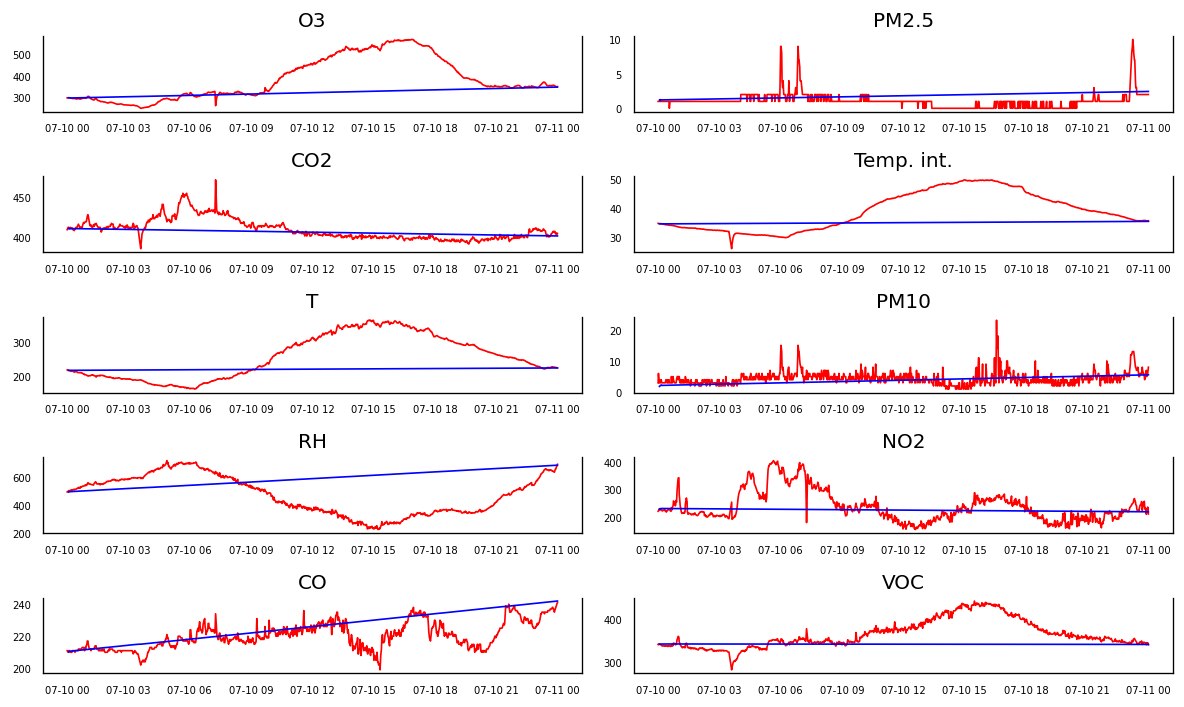

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plot
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data_1 = df_copy[df.columns[i]]
    data_pred=pred[pred.columns[i]]
    ax.plot(data_1, color='red', linewidth=1)
    ax.plot(data_pred, color='blue', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Predicting the values using the day before

In [29]:
import pandas as pd
import psycopg2
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates


conn = psycopg2.connect(host='playground.magentalab.it', port='55432', database='airqino', user='datareader', password='homntLZnlhQd9prtVA9SFezQek')

query = """select * from crosstab(
  'select sd.data_acquired as timestamp, s.sensor_type ,  sd.float_value as value 
from station_data sd join sensor s on s.id = sd.sensor_id
where sd.data_acquired >= to_timestamp(''2021-07-09 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'') 
and sd.data_acquired < to_timestamp(''2021-07-10 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'') 
and sd.station_id = 23284701 order by sd.data_acquired asc, 1'
 , $$VALUES ('O3'::varchar), ('PM2.5'::varchar), ('CO2'::varchar), ('Temp. int.'::varchar), ('T'::varchar)
 , ('PM10'::varchar), ('RH'::varchar), ('NO2'::varchar), ('CO'::varchar), ('VOC'::varchar)$$
) AS value ("Dates" timestamp, "O3" float, "PM2.5" float, "CO2" float, "Temp. int." float, "T" float, "PM10" float,
"RH" float, "NO2" float, "CO" float, "VOC" float);""".format(29510692, 23284701)  #23284701 is a specific station

df_train = pd.read_sql(query, conn)
df_train= df_train.set_index('Dates')

#fix Temp. int.
df_train['Temp. int.'] = df_train['Temp. int.'].div(100)

#removing nans
df_train = df_train.dropna()
train_lenght=len(df_train)

df_train=df_train.append(df_copy)

display(df_train)

,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,
2021-07-09 00:00:00,337.0,2.0,405.0,36.39,233.0,5.0,747.0,156.0,244.0,330.0
2021-07-09 00:01:00,336.0,2.0,404.0,36.43,233.0,5.0,752.0,154.0,245.0,328.0
2021-07-09 00:03:00,334.0,2.0,404.0,36.39,233.0,6.0,749.0,154.0,246.0,327.0
2021-07-09 00:04:00,333.0,2.0,403.0,36.32,233.0,7.0,758.0,159.0,245.0,329.0
2021-07-09 00:06:00,331.0,2.0,403.0,36.34,232.0,7.0,760.0,163.0,246.0,328.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-10 23:54:00,351.0,2.0,404.0,35.54,226.0,7.0,654.0,210.0,237.0,340.0
2021-07-10 23:55:00,350.0,2.0,404.0,35.51,226.0,5.0,654.0,226.0,238.0,344.0
2021-07-10 23:57:00,349.0,2.0,403.0,35.48,226.0,6.0,669.0,224.0,239.0,343.0


Test first 3 colums: O3, PM2.5, CO2

In [35]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(ts_data, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(ts_data, autolag='AIC')
    else:
        adf_test = adfuller(ts_data[column], autolag='AIC')
    p_value = adf_test[1]                   
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    return test_result

adf_test_results1 = {
    col: test_stationarity(df_train, col)
    for col in df_train[df_train.columns[0:3]].columns
}
adf_test_results1    

{'CO2': 'Stationary', 'O3': 'Stationary', 'PM2.5': 'Stationary'}

Test T, Temp. int. and PM10

In [36]:
adf_test_results2 = {
    col: test_stationarity(df_train, col)
    for col in df_train[df_train.columns[3:6]].columns
}
adf_test_results2   

{'PM10': 'Stationary', 'T': 'Stationary', 'Temp. int.': 'Stationary'}

Test RH, NO2, CO and VOC

In [37]:
adf_test_results3 = {
    col: test_stationarity(df_train, col)
    for col in df_train[df_train.columns[6:10]].columns
}
adf_test_results3   

{'CO': 'Stationary',
 'NO2': 'Stationary',
 'RH': 'Stationary',
 'VOC': 'Stationary'}

Converting to stationary with differencing

In [33]:
#before differencing
df_copy_train= df_train.copy()

In [34]:
def differencing(data, column, order):
    differenced_data = data[column].diff(order)
    differenced_data.fillna(differenced_data.mean(), inplace=True)
    return differenced_data
for col in df.columns:
    df_train[col] = differencing(df_train, col, 1)

Test for stationarity now

Finding the best lag for VAR model

In [38]:
from statsmodels.tsa.api import VAR
max_lag = 40
var_model_train = VAR(df_train)
# select the best lag order
lag_results_train = var_model_train.select_order(max_lag)
selected_lag_train = lag_results_train.aic
print(selected_lag_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


6


In [39]:
var_train = VAR(df_train)
var_fitresults_train = var_train.fit(selected_lag)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [40]:
forecast_input_train = df_train.values[-(train_lenght+selected_lag):]
forecast_train = var_fitresults_train.forecast(forecast_input_train, steps=len(df)-selected_lag)

Making it a dataframe

In [41]:
df_forecast_train = pd.DataFrame(forecast_train, index=df_copy.index[-(len(df_copy)-selected_lag):], columns=df_train.columns)


In [42]:
df_training= df_copy_train[0:-(len(df_copy)-(train_lenght+selected_lag))]
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)] = df_train[col].iloc[-1] + df_fc[str(col)].cumsum()
    return df_fc
pred_train = invert_transformation(df_training, df_forecast_train, second_diff=False)
display(pred_train)     


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,
2021-07-10 00:04:00,352.141269,2.165842,402.834287,35.466639,226.250265,6.508535,650.733538,214.779858,237.905922,341.285348
2021-07-10 00:06:00,351.569849,2.092216,402.631441,35.459839,225.882530,6.792734,651.269788,214.947517,237.629046,340.656858
2021-07-10 00:07:00,351.521202,2.178937,403.013264,35.446674,225.698576,7.086917,651.677336,215.888642,237.778883,340.875013
2021-07-10 00:09:00,351.315284,2.098667,403.150189,35.450654,225.683574,6.599333,652.087714,215.626334,237.741755,340.730847
2021-07-10 00:11:00,351.323785,2.133830,403.130611,35.443085,225.685891,6.732623,651.998490,215.631313,237.815564,340.810773
...,...,...,...,...,...,...,...,...,...,...
2021-07-10 23:54:00,359.551166,2.179519,402.669551,34.981790,221.575138,7.738944,620.586679,246.208051,235.712998,347.097968
2021-07-10 23:55:00,359.560133,2.179567,402.669105,34.981295,221.570701,7.739970,620.552431,246.241181,235.710727,347.104839
2021-07-10 23:57:00,359.569099,2.179615,402.668660,34.980799,221.566263,7.740997,620.518184,246.274311,235.708456,347.111711


Comparing the actual values and the predicted values

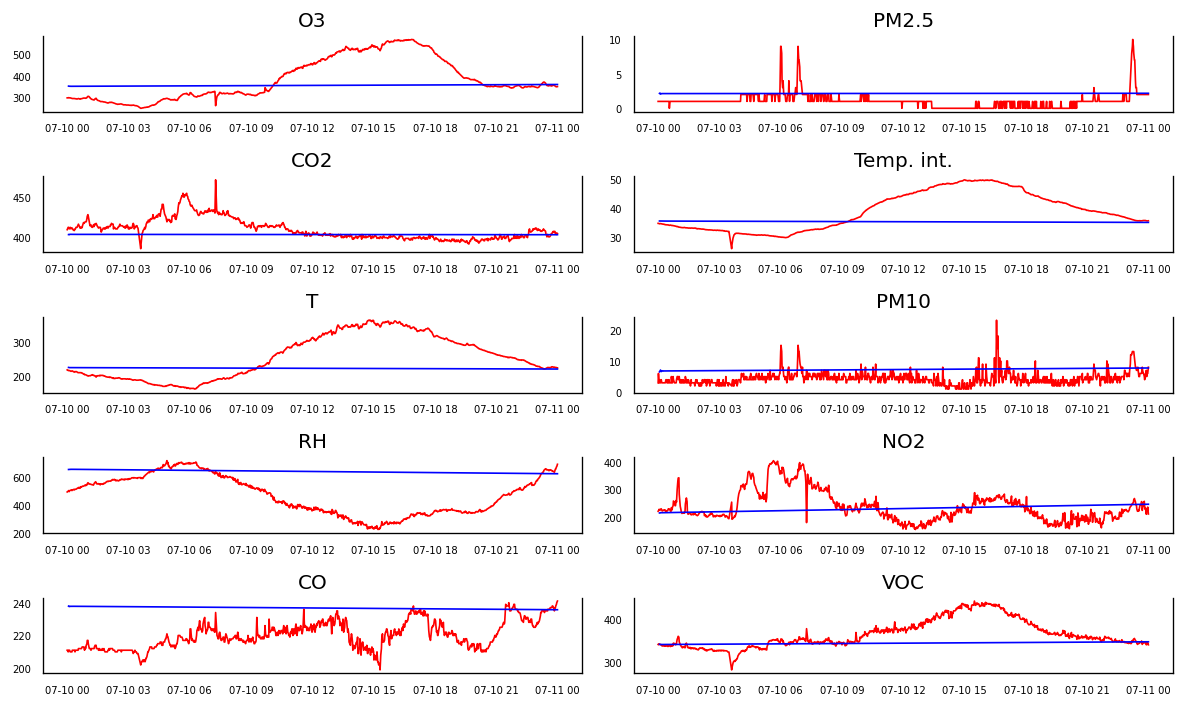

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plot
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data_train = df_copy[df.columns[i]]
    data_pred=pred_train[pred_train.columns[i]]
    ax.plot(data_train, color='red', linewidth=1)
    ax.plot(data_pred, color='blue', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Comparing to the avarage values

Creating a data frame with the actual values and the avg values 

In [44]:
import pandas as pd
import psycopg2
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline


conn = psycopg2.connect(host='playground.magentalab.it', port='55432', database='airqino', user='datareader', password='homntLZnlhQd9prtVA9SFezQek')

query=""" select * 
from (select * from crosstab(
  'select sd.data_acquired as timestamp, s.sensor_type ,  sd.float_value as value 
from station_data sd join sensor s on s.id = sd.sensor_id
where sd.data_acquired >= to_timestamp(''2021-07-10 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
 and sd.data_acquired <= to_timestamp(''2021-07-11 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
and sd.station_id = 23284701 order by sd.data_acquired asc, 1'
 , $$VALUES ('O3'::varchar), ('PM2.5'::varchar), ('CO2'::varchar), ('Temp. int.'::varchar), ('T'::varchar)
 , ('PM10'::varchar), ('RH'::varchar), ('NO2'::varchar), ('CO'::varchar), ('VOC'::varchar)$$
) AS value ("Dates" timestamp, "O3" float, "PM2.5" float, "CO2" float, "Temp. int." float, "T" float, "PM10" float,
"RH" float, "NO2" float, "CO" float, "VOC" float)) c
join (select time_bucket('1 hour', c."Dates" ) as "bucket", avg(c."O3") as "avgO3" ,  avg(c."PM2.5") as "avgPM2.5", avg(c."CO2") as "avgCO2",
 avg(c."Temp. int.") as "avgTempInt",  avg(c."T") as "avgT",  avg(c."PM10") as "avgPM10", avg(c."RH") as "avgRH", avg(c."NO2") as 
 "avgNO2", avg(c."CO") as "avgCO", avg(c."VOC") as "avgVOC"
from (select * from crosstab(
  'select sd.data_acquired as timestamp, s.sensor_type ,  sd.float_value as value 
from station_data sd join sensor s on s.id = sd.sensor_id
where sd.data_acquired >= to_timestamp(''2021-07-10 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
 and sd.data_acquired <= to_timestamp(''2021-07-11 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
and sd.station_id = 23284701 order by sd.data_acquired asc, 1'
 , $$VALUES ('O3'::varchar), ('PM2.5'::varchar), ('CO2'::varchar), ('Temp. int.'::varchar), ('T'::varchar)
 , ('PM10'::varchar), ('RH'::varchar), ('NO2'::varchar), ('CO'::varchar), ('VOC'::varchar)$$
) AS value ("Dates" timestamp, "O3" float, "PM2.5" float, "CO2" float, "Temp. int." float, "T" float, "PM10" float,
"RH" float, "NO2" float, "CO" float, "VOC" float))  c 
group by bucket
order by bucket asc) t
on c."Dates" BETWEEN t.bucket AND t.bucket + interval '1 hour'
 """

average_values = pd.read_sql(query, conn)
average_values=average_values.set_index('Dates')
#fix temp int
average_values['Temp. int.'] = average_values['Temp. int.'].div(100)
average_values['avgTempInt'] = average_values['avgTempInt'].div(100)

In [45]:
average_values = average_values.iloc[selected_lag:, :]
average_values['Predictions'] = data['Predictions']
display(average_values)


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,bucket,avgO3,avgPM2.5,avgCO2,avgTempInt,avgT,avgPM10,avgRH,avgNO2,avgCO,avgVOC,Predictions
Dates,,,,,,,,,,,,,,,,,,,,,,
2021-07-10 00:04:00,299.0,1.0,412.0,34.50,217.0,4.0,500.0,226.0,211.0,341.0,2021-07-10 00:00:00,295.794872,0.974359,413.102564,34.104872,211.897436,3.512821,515.820513,237.282051,211.615385,340.435897,0
2021-07-10 00:06:00,298.0,1.0,410.0,34.55,217.0,3.0,493.0,225.0,211.0,341.0,2021-07-10 00:00:00,295.794872,0.974359,413.102564,34.104872,211.897436,3.512821,515.820513,237.282051,211.615385,340.435897,0
2021-07-10 00:07:00,298.0,1.0,411.0,34.57,217.0,3.0,498.0,228.0,211.0,341.0,2021-07-10 00:00:00,295.794872,0.974359,413.102564,34.104872,211.897436,3.512821,515.820513,237.282051,211.615385,340.435897,0
2021-07-10 00:09:00,298.0,1.0,412.0,34.52,216.0,4.0,502.0,230.0,210.0,339.0,2021-07-10 00:00:00,295.794872,0.974359,413.102564,34.104872,211.897436,3.512821,515.820513,237.282051,211.615385,340.435897,0
2021-07-10 00:11:00,297.0,1.0,410.0,34.45,215.0,3.0,503.0,225.0,210.0,339.0,2021-07-10 00:00:00,295.794872,0.974359,413.102564,34.104872,211.897436,3.512821,515.820513,237.282051,211.615385,340.435897,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-10 23:55:00,350.0,2.0,404.0,35.51,226.0,5.0,654.0,226.0,238.0,344.0,2021-07-10 23:00:00,356.230769,3.410256,405.487179,35.735641,225.871795,7.641026,633.615385,238.102564,234.769231,345.820513,0
2021-07-10 23:57:00,349.0,2.0,403.0,35.48,226.0,6.0,669.0,224.0,239.0,343.0,2021-07-10 23:00:00,356.230769,3.410256,405.487179,35.735641,225.871795,7.641026,633.615385,238.102564,234.769231,345.820513,0
2021-07-10 23:58:00,349.0,2.0,405.0,35.50,225.0,6.0,672.0,236.0,240.0,345.0,2021-07-10 23:00:00,356.230769,3.410256,405.487179,35.735641,225.871795,7.641026,633.615385,238.102564,234.769231,345.820513,0


These are the anomalies

In [46]:
anomalies_average = average_values[(average_values['Predictions'] == 1)]
anomalies_average

,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,bucket,avgO3,avgPM2.5,avgCO2,avgTempInt,avgT,avgPM10,avgRH,avgNO2,avgCO,avgVOC,Predictions
Dates,,,,,,,,,,,,,,,,,,,,,,
2021-07-10 00:56:00,297.0,1.0,419.0,33.54,204.0,5.0,538.0,300.0,214.0,353.0,2021-07-10 00:00:00,295.794872,0.974359,413.102564,34.104872,211.897436,3.512821,515.820513,237.282051,211.615385,340.435897,1
2021-07-10 00:58:00,299.0,1.0,423.0,33.55,203.0,5.0,540.0,331.0,215.0,357.0,2021-07-10 00:00:00,295.794872,0.974359,413.102564,34.104872,211.897436,3.512821,515.820513,237.282051,211.615385,340.435897,1
2021-07-10 00:59:00,302.0,1.0,426.0,33.43,202.0,4.0,549.0,341.0,217.0,360.0,2021-07-10 00:00:00,295.794872,0.974359,413.102564,34.104872,211.897436,3.512821,515.820513,237.282051,211.615385,340.435897,1
2021-07-10 01:02:00,305.0,1.0,426.0,33.33,201.0,5.0,549.0,283.0,215.0,347.0,2021-07-10 01:00:00,287.815789,1.000000,413.552632,33.093684,201.868421,3.342105,549.657895,224.368421,211.894737,335.105263,1
2021-07-10 01:04:00,304.0,1.0,421.0,33.34,202.0,3.0,550.0,255.0,213.0,343.0,2021-07-10 01:00:00,287.815789,1.000000,413.552632,33.093684,201.868421,3.342105,549.657895,224.368421,211.894737,335.105263,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-10 21:10:00,349.0,1.0,400.0,38.95,262.0,4.0,441.0,214.0,224.0,359.0,2021-07-10 21:00:00,349.405405,1.162162,398.675676,38.656216,257.567568,4.837838,466.513514,194.405405,231.324324,354.891892,1
2021-07-10 21:16:00,350.0,1.0,397.0,38.93,260.0,4.0,457.0,181.0,225.0,352.0,2021-07-10 21:00:00,349.405405,1.162162,398.675676,38.656216,257.567568,4.837838,466.513514,194.405405,231.324324,354.891892,1
2021-07-10 21:39:00,348.0,1.0,394.0,38.49,255.0,2.0,469.0,174.0,237.0,350.0,2021-07-10 21:00:00,349.405405,1.162162,398.675676,38.656216,257.567568,4.837838,466.513514,194.405405,231.324324,354.891892,1
